In [502]:
import numpy as np
import matplotlib.pyplot as plt

# Code for Problem Set

### Problem 1

In [503]:
# 1.1
#The chance of getting a six and thus a day with pushups is 1/6. The distribution of days between
 
p = 1/6  # Probability of getting a six

# so expect aprox 6 days between sixes on average

p_not = 1-p  # Probability of not getting a six






Each day, a fair die is rolled. Push-ups are done if and only if a six is rolled.
Each day therefore constitutes an independent trial with success probability

$
p = \frac{1}{6}.
$

Let $ X $ denote the number of days between two days on which push-ups are done.
Then $ X $ is geometrically distributed, counting the number of trials up to and
including the first success.

The probability mass function is

$
\Pr(X = k) = (1 - p)^{k-1} p
= \left(\frac{5}{6}\right)^{k-1} \frac{1}{6},
\qquad k = 1, 2, 3, \dots
$

Thus, the distribution of days between doing push-ups follows a geometric
distribution with parameter $ p = \frac{1}{6} $.

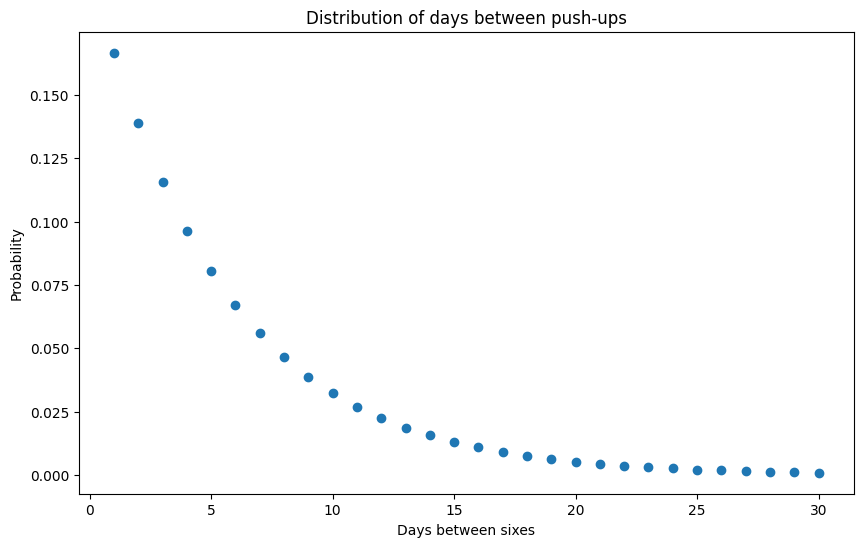

In [504]:
k = np.linspace(1, 30, 30)  # Days between sixes
P_k = p * (p_not)**(k - 1)  # Geometric distribution

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(k, P_k,'o')
plt.title('Distribution of days between push-ups')
plt.xlabel('Days between sixes')
plt.ylabel('Probability')
plt.savefig('DaysBetweenSixes',dpi=600)

So theres highest prop for getting only one day bewtten sixes. beacuse day one is prop 1/6, but next day is both prop for not getting six 1st fay 5/6 times 1/6 and so on.

In [505]:
N = 120  # Number of die rolls if you got six
K = 10


n_rolls = 120

# per-day moments
EY = n_rolls * p
VarY = n_rolls * p * (1 - p)

EX = p * EY
VarX = p * VarY + (EY**2) * p * (1 - p)

# over K days
mean_total = K * EX
var_total = K * VarX
std_total = np.sqrt(var_total)

median_approx = np.round(mean_total)

print("Mean push-ups in", K, "days:", mean_total)
print("Standard deviation:", std_total)
print("Approximate median push-ups in", K, "days:", median_approx)

Mean push-ups in 10 days: 33.33333333333333
Standard deviation: 24.152294576982396
Approximate median push-ups in 10 days: 33.0


median can not be found analytically. would have to simulate

In [506]:
# Djoser pyramid alignment analysis
print("="*70)
print("DJOSER PYRAMID ALIGNMENT BY COINCIDENCE")
print("="*70)

# Given: Alignment is within 3 degrees of north
alignment_tolerance = 3  # degrees

# Total possible orientations (full circle)
total_range = 360  # degrees

# Acceptable alignment range: ±3 degrees from north
# This creates a window of 2 × 3 = 6 degrees
alignment_window = 2 * alignment_tolerance  # degrees

# Probability of random alignment within ±3 degrees
p_coincidence = alignment_window / total_range

print(f"\nAlignment tolerance: ±{alignment_tolerance}°")
print(f"Acceptable window: {alignment_window}° (out of {total_range}°)")
print(f"\nProbability of alignment by pure coincidence:")
print(f"  P = {alignment_window}/{total_range} = {p_coincidence:.4f}")
print(f"  P = {p_coincidence*100:.2f}%")
print(f"  P ≈ 1/{1/p_coincidence:.0f}")

# Interpretation
print(f"\n{'='*70}")
print("INTERPRETATION")
print("="*70)
if p_coincidence < 0.05:
    print(f"✓ Probability < 5% → Alignment is statistically SIGNIFICANT")
    print(f"  → Unlikely to be by coincidence alone")
else:
    print(f"✗ Probability ≥ 5% → Alignment could be by coincidence")

print(f"\nConclusion: There is approximately a {p_coincidence*100:.1f}% chance")
print(f"that the Djoser pyramid's alignment is purely coincidental.")

DJOSER PYRAMID ALIGNMENT BY COINCIDENCE

Alignment tolerance: ±3°
Acceptable window: 6° (out of 360°)

Probability of alignment by pure coincidence:
  P = 6/360 = 0.0167
  P = 1.67%
  P ≈ 1/60

INTERPRETATION
✓ Probability < 5% → Alignment is statistically SIGNIFICANT
  → Unlikely to be by coincidence alone

Conclusion: There is approximately a 1.7% chance
that the Djoser pyramid's alignment is purely coincidental.


### Problem 2

In [507]:
#2.1 maybe do it prettier with same sympy format as troels
r_e = 149e-6
sigma_r_e = 3e-6

r_p = 25e-6
sigma_r_p = 5e-6
r_c = 309e-6
sigma_r_c = 20e-6

# Solve for a and b in the equation
# a*DH_ratio_proto+b*DH_ratio_comet == DH_ratio_earth
import sympy as sp
from sympy import symbols, Eq, solve


a, b = symbols('a b')
r_e, r_p, r_c = symbols('r_e r_p r_c')
eq1 = Eq(a * r_p + b * r_c, r_e)
eq2 = Eq(a + b, 1)
solution = solve((eq1, eq2), (a, b))
a_value = solution[a]
b_value = solution[b]



solution = solve((eq1, eq2), (a, b))

print("a =")
print(sp.pretty(solution[a], use_unicode=True))
print("\nb =")
print(sp.pretty(solution[b], use_unicode=True))


# ERror propagation
da_dr_e = sp.diff(a_value, r_e)
da_dr_p = sp.diff(a_value, r_p)
da_dr_c = sp.diff(a_value, r_c)
db_dr_e = sp.diff(b_value, r_e)
db_dr_p = sp.diff(b_value, r_p)
db_dr_c = sp.diff(b_value, r_c)


sigma_a_expr = sp.sqrt((da_dr_e * sigma_r_e)**2 + (da_dr_p * sigma_r_p)**2 + (da_dr_c * sigma_r_c)**2)
sigma_b_expr = sp.sqrt((db_dr_e * sigma_r_e)**2 + (db_dr_p * sigma_r_p)**2 + (db_dr_c * sigma_r_c)**2)

# Substitute numeric values
a_numeric = float(a_value.subs({r_e: 149e-6, r_p: 25e-6, r_c: 309e-6}))
b_numeric = float(b_value.subs({r_e: 149e-6, r_p: 25e-6, r_c: 309e-6}))
sigma_a = float(sigma_a_expr.subs({r_e: 149e-6, r_p: 25e-6, r_c: 309e-6}))
sigma_b = float(sigma_b_expr.subs({r_e: 149e-6, r_p: 25e-6, r_c: 309e-6}))

print(f"fraction from protosolar nebula: {a_numeric:.4f} ± {sigma_a:.4f}")
print(f"fraction from comets: {b_numeric:.4f} ± {sigma_b:.4f}")




a =
r_c - rₑ
────────
r_c - rₚ

b =
rₑ - rₚ 
────────
r_c - rₚ
fraction from protosolar nebula: 0.5634 ± 0.0340
fraction from comets: 0.4366 ± 0.0340


Decay rate: 20.03 ± 0.88 counts/s
Relative uncertainty: 0.0438
Intersection at relative uncertainty = 0.025 occurs at decay time: 193.24 s


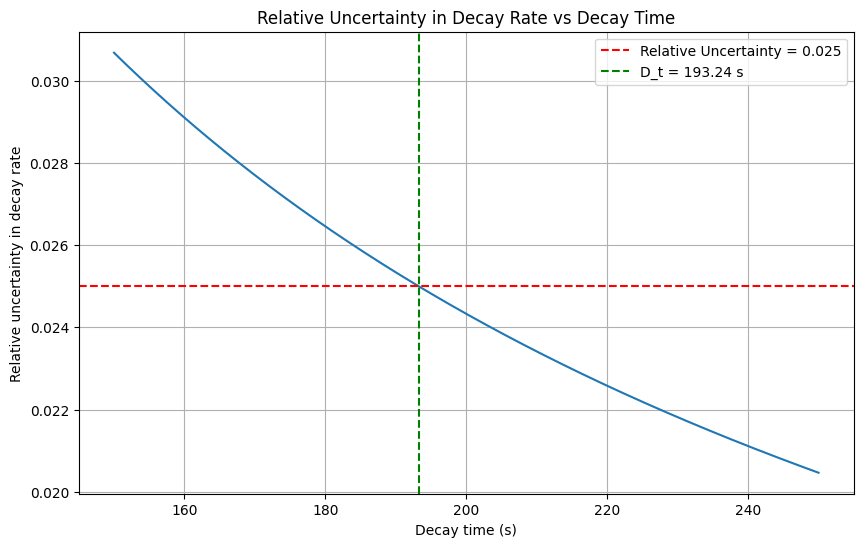

In [508]:
#2.2

d_t = 98.4          #s
sigma_d_t = 3.7     #s
N = 1971            #counts
# N is counted events so poisson uncertainty applies
sigma_N = np.sqrt(N)
r = N / d_t  
sigma_r = np.sqrt( (sigma_N / d_t)**2 + (N * sigma_d_t / d_t**2)**2 )

print(f"Decay rate: {r:.2f} ± {sigma_r:.2f} counts/s")

#relative uncertainty
rel_uncertainty = sigma_r / r
print(f"Relative uncertainty: {rel_uncertainty:.4f}")
d_t_list = np.linspace(150, 250, 1000)
Nlist =r*d_t_list
sigma_Nlist = np.sqrt(Nlist)
sigma_rlist = np.sqrt( (sigma_Nlist / d_t_list)**2 + (Nlist * sigma_d_t / d_t_list**2)**2 )
rel_uncertainty_list = sigma_rlist / (Nlist / d_t_list)

#calculate intersect with y = 0.025
intersect_index = np.argmin(np.abs(rel_uncertainty_list - 0.025))
intersect_d_t = d_t_list[intersect_index]
print(f"Intersection at relative uncertainty = 0.025 occurs at decay time: {intersect_d_t:.2f} s")

plt.figure(figsize=(10, 6))
plt.plot(d_t_list, rel_uncertainty_list)
plt.xlabel('Decay time (s)')
plt.ylabel('Relative uncertainty in decay rate')
plt.title('Relative Uncertainty in Decay Rate vs Decay Time')
plt.axhline(0.025, color='red', linestyle='--', label='Relative Uncertainty = 0.025')
plt.axvline(intersect_d_t, color='green', linestyle='--', label=f'D_t = {intersect_d_t:.2f} s')
plt.legend()
plt.grid()





In [509]:
# 2.3
import pandas as pd

dataframe = pd.read_csv('data_PylonPositions.csv', header=0)
Ppos, Ppos_unc = dataframe.values.T
dataframe

for i in range(10):
    print(f"  Pylon Position: {Ppos[i]:7.3f} +- {Ppos_unc[i]:7.3f} m")


  Pylon Position:  49.376 +-  -1.000 m
  Pylon Position:  51.980 +-  -1.000 m
  Pylon Position:  57.190 +-  -1.000 m
  Pylon Position:  53.239 +-  -1.000 m
  Pylon Position:  39.348 +-  -1.000 m
  Pylon Position:  50.444 +-  -1.000 m
  Pylon Position:  46.645 +-  -1.000 m
  Pylon Position:  53.130 +-  -1.000 m
  Pylon Position:  50.621 +-  -1.000 m
  Pylon Position:  50.049 +-  -1.000 m


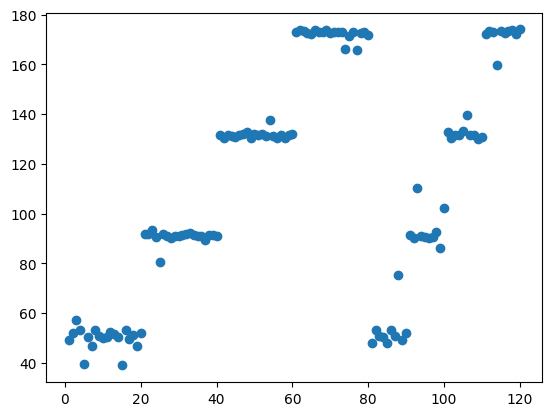

In [510]:
Ppos_index = np.arange(1, len(Ppos) + 1)
plt.scatter(Ppos_index, Ppos)

In [511]:
#Ppos_1 from 30-60, Ppos_2 from 70-115, Ppos_3 from 120-150,Ppos_4 from 155-180

Ppos_1 = Ppos[(Ppos>=30) & (Ppos<60)]
sigmas_1 = Ppos_unc[(Ppos>=30) & (Ppos<60)]
print(Ppos_1)
Ppos_2 = Ppos[(Ppos>=70) & (Ppos<115)]
sigmas_2 = Ppos_unc[(Ppos>=70) & (Ppos<115)]
print(Ppos_2)
Ppos_3 = Ppos[(Ppos>=120) & (Ppos<150)]
sigmas_3 = Ppos_unc[(Ppos>=120) & (Ppos<150)]
print(Ppos_3)
Ppos_4 = Ppos[(Ppos>=155) & (Ppos<180)]
sigmas_4 = Ppos_unc[(Ppos>=155) & (Ppos<180)]
print(Ppos_4)
print(len(Ppos), len(Ppos_1)+len(Ppos_2)+len(Ppos_3)+len(Ppos_4))
p1_mean = np.mean(Ppos_1)
p2_mean = np.mean(Ppos_2)
p3_mean = np.mean(Ppos_3)
p4_mean = np.mean(Ppos_4)
print(f"Pylon position means: {p1_mean:.3f}, {p2_mean:.3f}, {p3_mean:.3f}, {p4_mean:.3f}")

[49.376 51.98  57.19  53.239 39.348 50.444 46.645 53.13  50.621 50.049
 50.254 52.488 51.622 50.462 38.946 53.124 49.541 51.106 46.639 52.109
 47.813 53.014 50.852 50.391 48.16  53.047 50.831 49.171 51.958]
[ 91.852  91.733  93.459  90.583  80.364  91.898  90.842  90.198  91.058
  90.914  91.536  91.976  92.119  91.318  91.028  90.954  89.421  91.431
  91.503  91.089  75.341  91.403  90.068 110.35   91.008  90.411  90.275
  90.463  92.582  86.333 102.12 ]
[131.675 130.421 131.656 131.132 131.001 131.613 132.154 132.941 130.275
 132.038 131.654 132.055 131.392 137.712 131.357 130.425 131.732 130.6
 131.756 132.09  132.792 130.587 131.47  131.74  133.063 139.577 131.612
 131.737 130.139 130.86 ]
[173.222 173.981 173.508 172.834 172.157 173.726 173.004 172.972 173.763
 172.805 172.956 172.918 172.911 166.262 171.602 173.039 165.978 172.576
 173.168 171.949 172.356 173.611 172.996 159.91  173.446 172.586 173.253
 173.993 172.37  174.054]
120 120
Pylon position means: 50.122, 91.149, 131.97

In [512]:
from scipy.stats import norm

def iterative_pvalue_clip(data,sigmas, p_threshold=0.01):
    data = np.asarray(data, dtype=float)

    while len(data) > 2:
        mu = np.mean(data)
        sigma = np.std(data, ddof=1)

        if sigma == 0:
            break

        distances = np.abs(data - mu)
        idx = np.argmax(distances)


        z = distances[idx] / sigma
        p_value = 2 * (1 - norm.cdf(z))  # two-sided

        if p_value < p_threshold:
            print(
                f"Removed value = {data[idx]:.6g}, "
                f"z = {z:.3f}σ, "
                f"p = {p_value:.3e}"
            )
            data = np.delete(data, idx)
            sigmas = np.delete(sigmas, idx)
        else:
            break

    return data, sigmas

In [513]:
Ppos_1_cleaned, sigmas_1_cleaned = iterative_pvalue_clip(Ppos_1, sigmas_1)
print(len(Ppos_1), len(Ppos_1_cleaned),np.mean(Ppos_1_cleaned), np.std(Ppos_1_cleaned, ddof=1))
Ppos_2_cleaned, sigmas_2_cleaned = iterative_pvalue_clip(Ppos_2, sigmas_2)
print(len(Ppos_2), len(Ppos_2_cleaned),np.mean(Ppos_2_cleaned), np.std(Ppos_2_cleaned, ddof=1))
Ppos_3_cleaned, sigmas_3_cleaned = iterative_pvalue_clip(Ppos_3, sigmas_3)  
print(len(Ppos_3), len(Ppos_3_cleaned),np.mean(Ppos_3_cleaned), np.std(Ppos_3_cleaned, ddof=1))
Ppos_4_cleaned, sigmas_4_cleaned = iterative_pvalue_clip(Ppos_4, sigmas_4)  
print(len(Ppos_4), len(Ppos_4_cleaned),np.mean(Ppos_4_cleaned), np.std(Ppos_4_cleaned, ddof=1)) 

Removed value = 38.946, z = 2.987σ, p = 2.818e-03
Removed value = 39.348, z = 3.583σ, p = 3.403e-04
Removed value = 57.19, z = 2.764σ, p = 5.717e-03
29 26 50.69484615384616 1.9240552734743912
Removed value = 110.35, z = 3.512σ, p = 4.448e-04
Removed value = 75.341, z = 3.597σ, p = 3.221e-04
Removed value = 102.12, z = 3.521σ, p = 4.307e-04
Removed value = 80.364, z = 4.352σ, p = 1.347e-05
Removed value = 86.333, z = 3.731σ, p = 1.906e-04
Removed value = 93.459, z = 2.652σ, p = 8.007e-03
31 25 91.10652 0.7322760249159234
Removed value = 139.577, z = 3.849σ, p = 1.184e-04
Removed value = 137.712, z = 4.347σ, p = 1.378e-05
30 28 131.49882142857146 0.7708220265150996
Removed value = 159.91, z = 4.133σ, p = 3.579e-05
Removed value = 165.978, z = 3.495σ, p = 4.735e-04
Removed value = 166.262, z = 4.602σ, p = 4.195e-06
30 27 173.02800000000002 0.6243822177529968


In [514]:
pylon1_mean = np.mean(Ppos_1_cleaned)
pylon1_unc = np.std(Ppos_1_cleaned, ddof=1) / np.sqrt(len(Ppos_1_cleaned))
pylon2_mean = np.mean(Ppos_2_cleaned)
pylon2_unc = np.std(Ppos_2_cleaned, ddof=1) / np.sqrt(len(Ppos_2_cleaned))
pylon3_mean = np.mean(Ppos_3_cleaned)
pylon3_unc = np.std(Ppos_3_cleaned, ddof=1) / np.sqrt(len(Ppos_3_cleaned))
pylon4_mean = np.mean(Ppos_4_cleaned)
pylon4_unc = np.std(Ppos_4_cleaned, ddof=1) / np.sqrt(len(Ppos_4_cleaned))
print(f"Pylon 1: {pylon1_mean:.3f} ± {pylon1_unc:.3f} m")
print(f"Pylon 2: {pylon2_mean:.3f} ± {pylon2_unc:.3f} m")
print(f"Pylon 3: {pylon3_mean:.3f} ± {pylon3_unc:.3f} m")
print(f"Pylon 4: {pylon4_mean:.3f} ± {pylon4_unc:.3f} m")

Pylon 1: 50.695 ± 0.377 m
Pylon 2: 91.107 ± 0.146 m
Pylon 3: 131.499 ± 0.146 m
Pylon 4: 173.028 ± 0.120 m


In [515]:
print(sigmas_1_cleaned)

[-1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.     1.83   1.831  1.821
  1.874  1.838  1.856  1.841  1.863  1.881]


In [516]:

def weighted_mean(positions, uncertainties):
    # Replace invalid uncertainties with median of valid ones
    uncertainties = np.array(uncertainties, dtype=float)
    valid_mask = uncertainties > 0
    
    if np.any(valid_mask):
        # Use median of valid uncertainties as replacement
        replacement_unc = np.median(uncertainties[valid_mask])
    else:
        # If no valid uncertainties, use sample std of positions
        replacement_unc = np.std(positions, ddof=1)
    
    uncertainties[~valid_mask] = replacement_unc
    
    weights = 1 / (uncertainties ** 2)
    weighted_avg = np.sum(positions * weights) / np.sum(weights)
    weighted_uncertainty = np.sqrt(1 / np.sum(weights))
    return weighted_avg, weighted_uncertainty

Ppos_1_wmean, Ppos_1_wunc = weighted_mean(Ppos_1_cleaned, sigmas_1_cleaned)
Ppos_2_wmean, Ppos_2_wunc = weighted_mean(Ppos_2_cleaned, sigmas_2_cleaned)
Ppos_3_wmean, Ppos_3_wunc = weighted_mean(Ppos_3_cleaned, sigmas_3_cleaned)
Ppos_4_wmean, Ppos_4_wunc = weighted_mean(Ppos_4_cleaned, sigmas_4_cleaned) 
print(f"Weighted means and uncertainties:")
print(f" Pylon 1: {Ppos_1_wmean:.3f} ± {Ppos_1_wunc:.3f} m")
print(f" Pylon 2: {Ppos_2_wmean:.3f} ± {Ppos_2_wunc:.3f} m")
print(f" Pylon 3: {Ppos_3_wmean:.3f} ± {Ppos_3_wunc:.3f} m")
print(f" Pylon 4: {Ppos_4_wmean:.3f} ± {Ppos_4_wunc:.3f} m")



Weighted means and uncertainties:
 Pylon 1: 50.693 ± 0.362 m
 Pylon 2: 91.051 ± 0.160 m
 Pylon 3: 131.507 ± 0.140 m
 Pylon 4: 173.025 ± 0.146 m


In [517]:
import scipy.stats as stats

def cross_check(a1, a1_err, a2, a2_err):
    diff = a1 - a2
    diff_err = np.sqrt(a1_err**2 + a2_err**2)
    z_score = diff / diff_err
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # two-tailed p-value
    return z_score, p_value

In [518]:
z1, p1 = cross_check(pylon1_mean, pylon1_unc, Ppos_1_wmean, Ppos_1_wunc)
print(f"Pylon 1 cross-check: z = {z1:.3f}, p = {p1:.3f}")
z2, p2 = cross_check(pylon2_mean, pylon2_unc, Ppos_2_wmean, Ppos_2_wunc)
print(f"Pylon 2 cross-check: z = {z2:.3f}, p = {p2:.3f}")
z3, p3 = cross_check(pylon3_mean, pylon3_unc, Ppos_3_wmean, Ppos_3_wunc)
print(f"Pylon 3 cross-check: z = {z3:.3f}, p = {p3:.3f}")
z4, p4 = cross_check(pylon4_mean, pylon4_unc, Ppos_4_wmean, Ppos_4_wunc)
print(f"Pylon 4 cross-check: z = {z4:.3f}, p = {p4:.3f}")

#combine results
p1_final = (pylon1_mean + Ppos_1_wmean) / 2
p1_final_unc = np.sqrt((pylon1_unc**2 + Ppos_1_wunc**2)) / 2
print(f"Final Pylon 1 position: {p1_final:.3f} ± {p1_final_unc:.3f} m")
p2_final = (pylon2_mean + Ppos_2_wmean) / 2
p2_final_unc = np.sqrt((pylon2_unc**2 + Ppos_2_wunc**2)) / 2
print(f"Final Pylon 2 position: {p2_final:.3f} ± {p2_final_unc:.3f} m")
p3_final = (pylon3_mean + Ppos_3_wmean) / 2
p3_final_unc = np.sqrt((pylon3_unc**2 + Ppos_3_wunc**2)) / 2
print(f"Final Pylon 3 position: {p3_final:.3f} ± {p3_final_unc:.3f} m")
p4_final = (pylon4_mean + Ppos_4_wmean) / 2
p4_final_unc = np.sqrt((pylon4_unc**2 + Ppos_4_wunc**2)) / 2
print(f"Final Pylon 4 position: {p4_final:.3f} ± {p4_final_unc:.3f} m")


Pylon 1 cross-check: z = 0.004, p = 0.997
Pylon 2 cross-check: z = 0.255, p = 0.799
Pylon 3 cross-check: z = -0.040, p = 0.968
Pylon 4 cross-check: z = 0.017, p = 0.986
Final Pylon 1 position: 50.694 ± 0.261 m
Final Pylon 2 position: 91.079 ± 0.109 m
Final Pylon 3 position: 131.503 ± 0.101 m
Final Pylon 4 position: 173.026 ± 0.095 m


In [519]:
#distance between pylons
d_12 = p2_final - p1_final
d_12_unc = np.sqrt(p1_final_unc**2 + p2_final_unc**2)
print(f"Distance between Pylon 1 and 2: {d_12:.3f} ± {d_12_unc:.3f} m")
d_23 = p3_final - p2_final  
d_23_unc = np.sqrt(p2_final_unc**2 + p3_final_unc**2)
print(f"Distance between Pylon 2 and 3: {d_23:.3f} ± {d_23_unc:.3f} m")
d_34 = p4_final - p3_final  
d_34_unc = np.sqrt(p3_final_unc**2 + p4_final_unc**2)
print(f"Distance between Pylon 3 and 4: {d_34:.3f} ± {d_34_unc:.3f} m")

Distance between Pylon 1 and 2: 40.385 ± 0.283 m
Distance between Pylon 2 and 3: 40.424 ± 0.148 m
Distance between Pylon 3 and 4: 41.523 ± 0.139 m


### Problem 3

In [520]:

def circle_overlap_area(x1, y1, r1, x2, y2, r2):
    # Distance between centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    # No overlap
    if d >= r1 + r2:
        return 0.0
    
    # One circle inside the other
    if d <= abs(r1 - r2):
        return np.pi * min(r1, r2)**2
    
    # Partial overlap
    term1 = r1**2 * np.arccos((d**2 + r1**2 - r2**2) / (2 * d * r1))
    term2 = r2**2 * np.arccos((d**2 + r2**2 - r1**2) / (2 * d * r2))
    term3 = 0.5 * np.sqrt((d + r1 + r2) * (-d + r1 + r2) * 
                          (d - r1 + r2) * (d + r1 - r2))
    
    return term1 + term2 - term3

# Example
area = circle_overlap_area(0, 0, 6, 3, 7, 4)
print(f"Overlap area: {area:.3f}")
circ_A_area = np.pi * 6**2
overlap_fraction_A = area / circ_A_area
circ_B_area = np.pi * 4**2
overlap_fraction_B = area / circ_B_area
print(f"Overlap fraction of circle A: {overlap_fraction_A:.3f}")

print(f"Overlap fraction of circle B: {overlap_fraction_B:.3f}")

Overlap area: 10.279
Overlap fraction of circle A: 0.091
Overlap fraction of circle B: 0.204


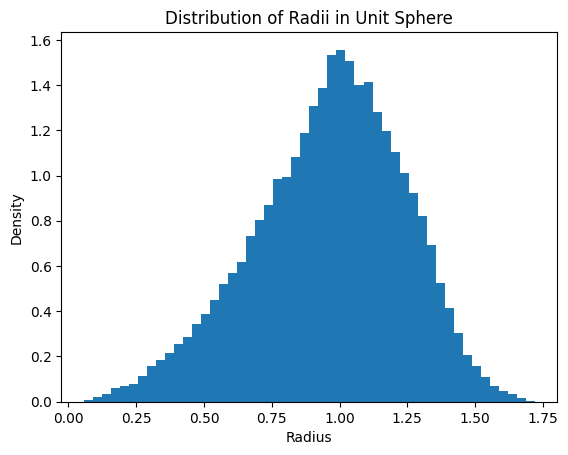

In [521]:
r = np.random # Random generator
r.seed(42)    # Set a random seed (but a fixed one)

N = 50000
x = r.uniform(-1, 1, N)
y = r.uniform(-1, 1, N)
z = r.uniform(-1, 1, N)
r_vals = np.sqrt(x**2 + y**2 + z**2)

plt.hist(r_vals, bins=50, density=True)
plt.xlabel('Radius')
plt.ylabel('Density')
plt.title('Distribution of Radii in Unit Sphere')
plt.savefig('sphericalCoordinatePlot',dpi = 600)


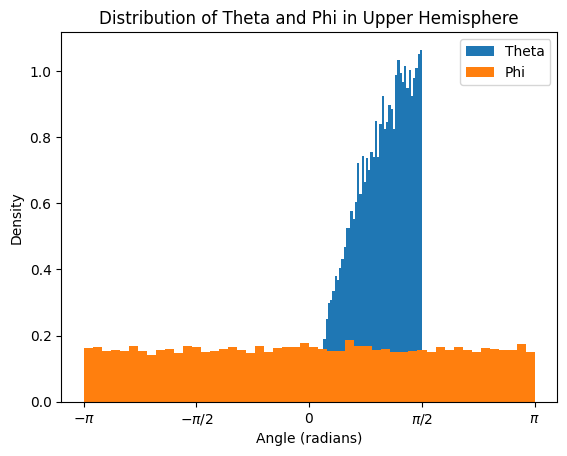

In [522]:
mask = r_vals < 1 & (z > 0)
theta = np.arccos(z[mask] / r_vals[mask])
phi = np.arctan2(y[mask], x[mask])
plt.figure()
plt.hist(theta, bins=50, density=True, label='Theta')
plt.hist(phi, bins=50, density=True, label='Phi')
plt.title('Distribution of Theta and Phi in Upper Hemisphere')  
plt.xlabel('Angle (radians)')
plt.ylabel('Density')
plt.legend()
plt.xticks(
    [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
)
plt.savefig("theataPhi",dpi = 600)


C:\Users\villa\AppData\Local\Temp\ipykernel_28892\2978599721.py:39: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  f_theory = f_theory / np.trapz(f_theory, v_theory)


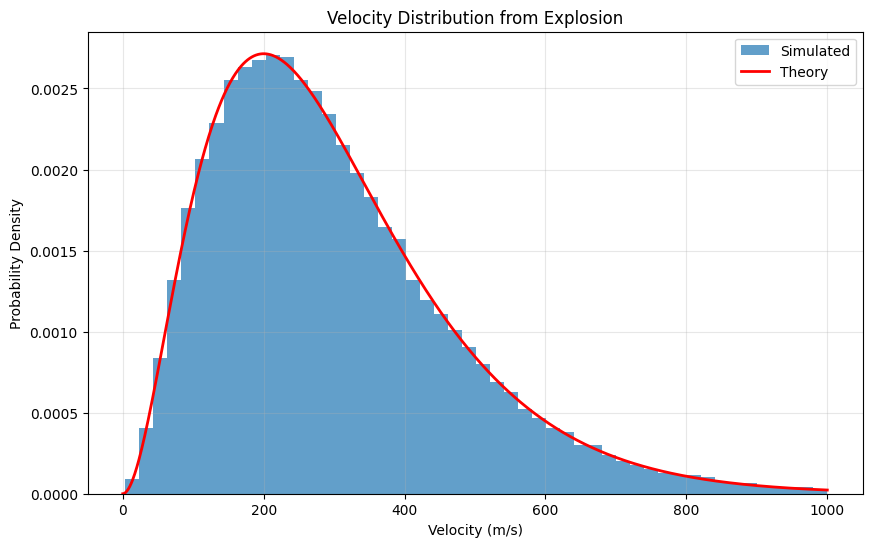

In [523]:
# 3.2 - Generate velocities using accept-reject method

# PDF: f(v) = (v/v0)^2 * exp(-v/v0)
v0 = 100  # m/s
g = 9.82  # m/s^2

# First, find the maximum of the PDF for accept-reject
# Take derivative: df/dv = (2v/v0^2)*exp(-v/v0) - (v^2/v0^3)*exp(-v/v0) = 0
# This gives v_max = 2*v0
v_max = 2 * v0
f_max = (v_max/v0)**2 * np.exp(-v_max/v0)

# Generate N velocities using accept-reject
N_velocities = 50000
velocities = []

while len(velocities) < N_velocities:
    # Propose v from uniform [0, some_max]
    v_prop = r.uniform(0, 10*v0, N_velocities)  # 6*v0 covers most of distribution
    
    # Calculate PDF values
    f_v = (v_prop/v0)**2 * np.exp(-v_prop/v0)
    
    # Accept-reject
    u = r.uniform(0, f_max, N_velocities)
    accepted = v_prop[u < f_v]
    velocities.extend(accepted)

velocities = np.array(velocities[:N_velocities])

# Plot velocity distribution
plt.figure(figsize=(10, 6))
plt.hist(velocities, bins=50, density=True, alpha=0.7, label='Simulated')

# Overlay theoretical PDF
v_theory = np.linspace(0, 1000, 1000)
f_theory = (v_theory/v0)**2 * np.exp(-v_theory/v0)
# Normalize
f_theory = f_theory / np.trapz(f_theory, v_theory)
plt.plot(v_theory, f_theory, 'r-', linewidth=2, label='Theory')

plt.xlabel('Velocity (m/s)')
plt.ylabel('Probability Density')
plt.title('Velocity Distribution from Explosion')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('acceptreject',dpi=600)

Statistics of radial distribution:
  Mean radial distance: 6003.98 m
  Median radial distance: 3629.23 m
  Std dev: 6579.74 m
  Max radial distance: 36100.34 m
  Min radial distance: 0.22 m


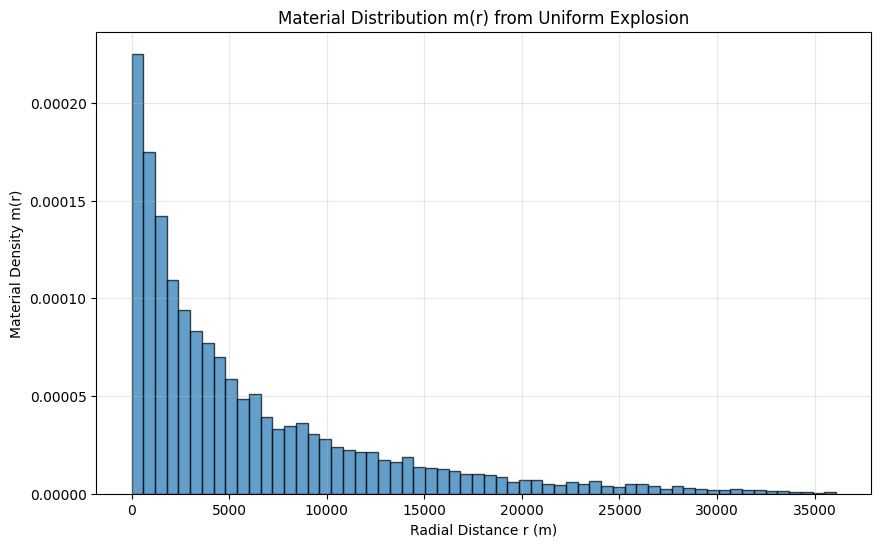

In [524]:
# Generate theta angles uniformly for upper hemisphere
# For a uniform explosion, theta should be uniform in [0, π/2]
N_sim = 10000
theta_angles = r.uniform(0, np.pi/2, N_sim)

# We already have velocities, but let's generate exactly 10000
velocities_sim = []
while len(velocities_sim) < N_sim:
    v_prop = r.uniform(0, 6*v0, N_sim)
    f_v = (v_prop/v0)**2 * np.exp(-v_prop/v0)
    u = r.uniform(0, f_max, N_sim)
    accepted = v_prop[u < f_v]
    velocities_sim.extend(accepted)

velocities_sim = np.array(velocities_sim[:N_sim])

# Calculate radial distances: r(v,θ) = sin(θ) * v^2 / g
r_distances = np.sin(theta_angles) * velocities_sim**2 / g

# Plot the material distribution m(r)
plt.figure(figsize=(10, 6))
plt.hist(r_distances, bins=60, density=True, alpha=0.7, edgecolor='black')
plt.xlabel('Radial Distance r (m)')
plt.ylabel('Material Density m(r)')
plt.title('Material Distribution m(r) from Uniform Explosion')
plt.grid(alpha=0.3)
plt.savefig('m(r)',dpi=600)

# Print statistics
print(f"Statistics of radial distribution:")
print(f"  Mean radial distance: {np.mean(r_distances):.2f} m")
print(f"  Median radial distance: {np.median(r_distances):.2f} m")
print(f"  Std dev: {np.std(r_distances):.2f} m")
print(f"  Max radial distance: {np.max(r_distances):.2f} m")
print(f"  Min radial distance: {np.min(r_distances):.2f} m")

### Problem 4

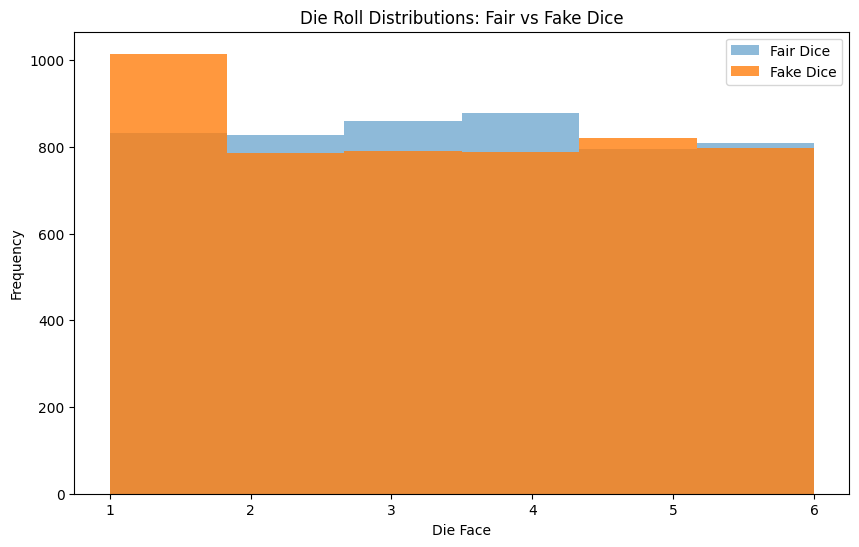

In [525]:
def dice(box_rolls=200, N_dice=25, fake=False):

    if fake:
        # Roll 24 fair dice + 1 fake die = 25 total
        die_rolls = r.randint(1, 7, size=(box_rolls, N_dice - 1))
        fake_val = r.randint(1, 7)
        fake_die = np.ones((box_rolls, 1), dtype=int) * fake_val
        die_rolls = np.hstack([die_rolls, fake_die])
    else:
        # Roll 25 fair dice
        die_rolls = r.randint(1, 7, size=(box_rolls, N_dice))
    
    return die_rolls

die_rolls_fair = dice(fake=False)
die_rolls_fake = dice(fake=True)

plt.figure(figsize=(10, 6))
plt.hist(die_rolls_fair.flatten(), bins=6, alpha=0.5, label='Fair Dice', density=False)
plt.hist(die_rolls_fake.flatten(), bins=6, alpha=0.8, label='Fake Dice', density=False)
plt.xlabel('Die Face')  
plt.ylabel('Frequency')
plt.title('Die Roll Distributions: Fair vs Fake Dice')
plt.legend()
plt.savefig('dice',dpi=600)



=== Fair Dice Test ===
Chi-square statistic: 0.89
p-value: 0.9710
Detected as fake: False
Observed counts: [2085 2107 2068 2061 2074 2105]
Expected counts: [2083.33333333 2083.33333333 2083.33333333 2083.33333333 2083.33333333
 2083.33333333]

=== Fake Die Test ===
Chi-square statistic: 125.22
p-value: 0.0000
Detected as fake: True
Observed counts: [1998 2025 1931 2061 2539 1946]
Expected counts: [2083.33333333 2083.33333333 2083.33333333 2083.33333333 2083.33333333
 2083.33333333]


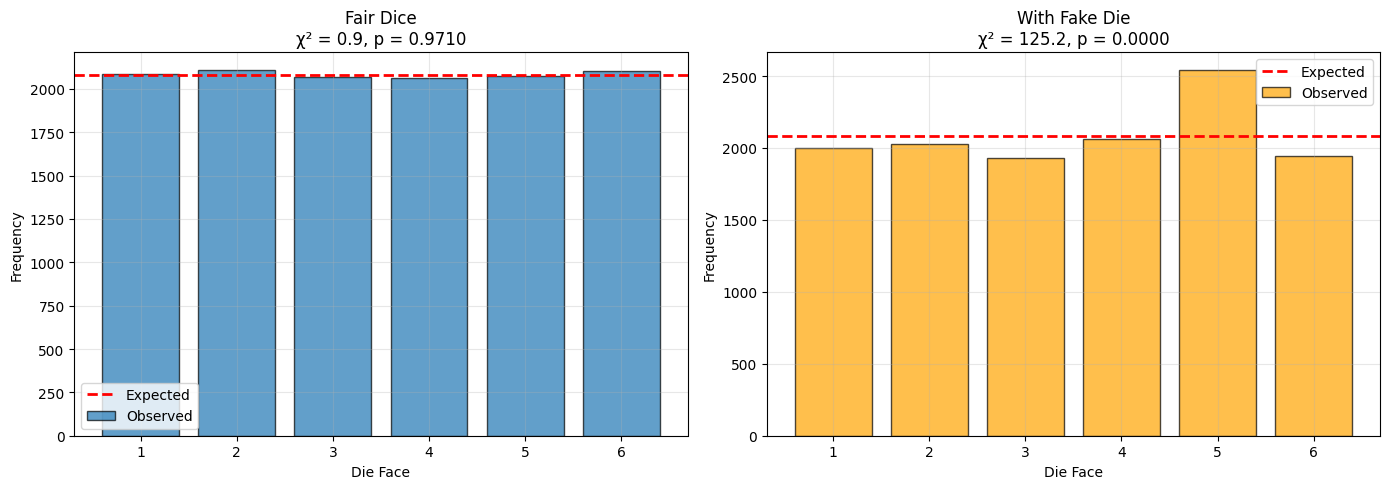

In [526]:

def test_for_fake_die(die_rolls):
    
    # Flatten all rolls
    all_rolls = die_rolls.flatten()
    
    # Count occurrences of each face (1-6)
    observed = np.bincount(all_rolls, minlength=7)[1:]  # Exclude index 0
    
    # Expected counts for fair dice (uniform distribution)
    total = len(all_rolls)
    expected = np.full(6, total / 6)
    
    # Chi-square test
    chi2, p_value = stats.chisquare(observed, expected)
    
    # Reject null hypothesis if p < 0.05
    is_fake = p_value < 0.05
    
    return chi2, p_value, is_fake, observed, expected

# Test with more rolls for better statistics
die_rolls_fair = dice(box_rolls=500, N_dice=25, fake=False)
die_rolls_fake = dice(box_rolls=500, N_dice=25, fake=True)

# Test fair dice
chi2_fair, p_fair, is_fake_fair, obs_fair, exp_fair = test_for_fake_die(die_rolls_fair)
print("=== Fair Dice Test ===")
print(f"Chi-square statistic: {chi2_fair:.2f}")
print(f"p-value: {p_fair:.4f}")
print(f"Detected as fake: {is_fake_fair}")
print(f"Observed counts: {obs_fair}")
print(f"Expected counts: {exp_fair}")

# Test fake dice
chi2_fake, p_fake, is_fake_fake, obs_fake, exp_fake = test_for_fake_die(die_rolls_fake)
print("\n=== Fake Die Test ===")
print(f"Chi-square statistic: {chi2_fake:.2f}")
print(f"p-value: {p_fake:.4f}")
print(f"Detected as fake: {is_fake_fake}")
print(f"Observed counts: {obs_fake}")
print(f"Expected counts: {exp_fake}")

# Visualize the difference
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Fair dice
axes[0].bar(range(1, 7), obs_fair, alpha=0.7, label='Observed', edgecolor='black')
axes[0].axhline(exp_fair[0], color='r', linestyle='--', linewidth=2, label='Expected')
axes[0].set_xlabel('Die Face')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Fair Dice\nχ² = {chi2_fair:.1f}, p = {p_fair:.4f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Fake dice
axes[1].bar(range(1, 7), obs_fake, alpha=0.7, label='Observed', 
            edgecolor='black', color='orange')
axes[1].axhline(exp_fake[0], color='r', linestyle='--', linewidth=2, label='Expected')
axes[1].set_xlabel('Die Face')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'With Fake Die\nχ² = {chi2_fake:.1f}, p = {p_fake:.4f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('diceTest',dpi=600)

Box rolls:    5 → Detection rate: 6.4%
Box rolls:   10 → Detection rate: 15.8%
Box rolls:   20 → Detection rate: 27.0%
Box rolls:   50 → Detection rate: 66.4%
Box rolls:   75 → Detection rate: 90.0%
Box rolls:  100 → Detection rate: 96.4%
Box rolls:  200 → Detection rate: 100.0%
Box rolls:  500 → Detection rate: 100.0%
Box rolls: 1000 → Detection rate: 100.0%
Box rolls: 2000 → Detection rate: 100.0%

✓ Need approximately 100 box rolls for 95% detection power


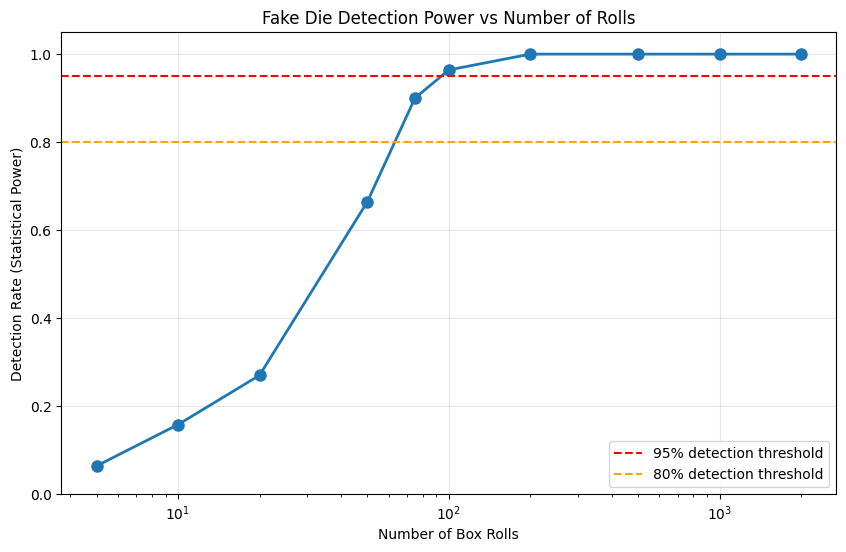

In [527]:
# Test detection power as a function of number of box rolls

def test_detection_power(n_simulations=1000, box_rolls_list=[5,10,20,50,75, 100, 200, 500, 1000, 2000]):
    """
    Test how many box rolls are needed to reliably detect a fake die.
    
    Returns: detection rates for each number of box rolls
    """
    detection_rates = []
    
    for n_rolls in box_rolls_list:
        detected = 0
        
        for _ in range(n_simulations):
            # Generate fake dice data
            die_rolls = dice(box_rolls=n_rolls, N_dice=25, fake=True)
            
            # Test if detected as fake
            _, p_value, is_fake, _, _ = test_for_fake_die(die_rolls)
            
            if is_fake:  # p < 0.05
                detected += 1
        
        detection_rate = detected / n_simulations
        detection_rates.append(detection_rate)
        print(f"Box rolls: {n_rolls:4d} → Detection rate: {detection_rate:.1%}")
    
    return box_rolls_list, detection_rates

# Run the power analysis
box_rolls_list, detection_rates = test_detection_power(n_simulations=500)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(box_rolls_list, detection_rates, 'o-', linewidth=2, markersize=8)
plt.axhline(0.95, color='red', linestyle='--', label='95% detection threshold')
plt.axhline(0.80, color='orange', linestyle='--', label='80% detection threshold')
plt.xlabel('Number of Box Rolls')
plt.ylabel('Detection Rate (Statistical Power)')
plt.title('Fake Die Detection Power vs Number of Rolls')
plt.grid(alpha=0.3)
plt.legend()
plt.xscale('log')  # Log scale for x-axis makes it easier to read
plt.ylim([0, 1.05])
plt.savefig('boxrolls',dpi=600)
# Find minimum rolls needed for 95% detection
threshold_95 = next((n for n, rate in zip(box_rolls_list, detection_rates) if rate >= 0.95), None)
if threshold_95:
    print(f"\n✓ Need approximately {threshold_95} box rolls for 95% detection power")
else:
    print(f"\n✗ Need more than {box_rolls_list[-1]} rolls for 95% detection")

### Problem 5

Data shape: (21933,)
Data range: [0.00, 9.99]
200


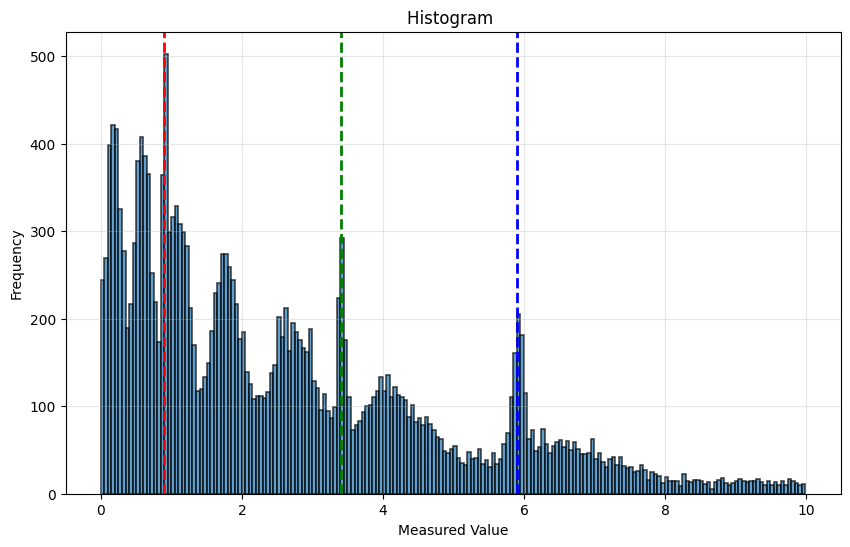

In [528]:
data = np.loadtxt('data_InconstantBackground.csv', delimiter=',', skiprows=1)

print(f"Data shape: {data.shape}")
print(f"Data range: [{np.min(data):.2f}, {np.max(data):.2f}]")

# Method 1: Use explicit bin edges (RECOMMENDED)
# This ensures bins align perfectly with data values
# n_bins = int(np.sqrt(len(data)))
n_bins = 200
print(n_bins)
bin_edges = np.linspace(np.min(data), np.max(data), n_bins + 1)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=bin_edges, alpha=0.7, edgecolor='black', linewidth=1.2)
plt.xlabel('Measured Value')
plt.ylabel('Frequency')
plt.title('Histogram ')

plt.axvline(0.9, color='red', linestyle='--', linewidth=2, label='x = 0.9')
plt.axvline(3.4, color='green', linestyle='--', linewidth=2, label='x = 3.4')
plt.axvline(5.9, color='blue', linestyle='--', linewidth=2, label='x = 5.9')


plt.grid(alpha=0.3)  

Text(0.5, 0, 'Measured Value (Background Region)')

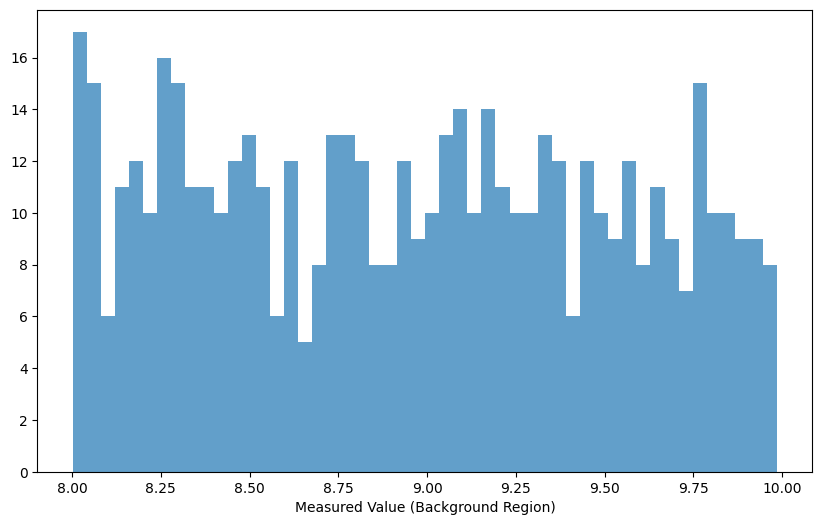

In [529]:
background = data[(data >= 8) & (data < 10)]

plt.figure(figsize=(10, 6))
plt.hist(background, bins=50, alpha=0.7)
plt.xlabel('Measured Value (Background Region)')

In [530]:

# print(f"Background data points: {len(background)}")
# print(f"Background range: [{np.min(background):.3f}, {np.max(background):.3f}]")

# # Test 1: Chi-square goodness-of-fit test for uniformity
# n_bins_test = 20  # Number of bins for chi-square test
# observed_counts, bin_edges = np.histogram(background, bins=n_bins_test)
# expected_counts = np.full(n_bins_test, len(background) / n_bins_test)

# chi2_stat, chi2_pvalue = stats.chisquare(observed_counts, expected_counts)

# print(f"\n=== Chi-Square Test for Uniformity ===")
# print(f"Chi-square statistic: {chi2_stat:.3f}")
# print(f"p-value: {chi2_pvalue:.4f}")
# print(f"Conclusion: {'Uniform' if chi2_pvalue > 0.05 else 'NOT uniform'} (at α=0.05)")

# # Test 2: Kolmogorov-Smirnov test
# # Compare to uniform distribution in [min, max] range
# ks_stat, ks_pvalue = stats.kstest(
#     background, 
#     stats.uniform(loc=np.min(background), 
#                   scale=np.max(background) - np.min(background)).cdf
# )

# print(f"\n=== Kolmogorov-Smirnov Test for Uniformity ===")
# print(f"KS statistic: {ks_stat:.4f}")
# print(f"p-value: {ks_pvalue:.4f}")
# print(f"Conclusion: {'Uniform' if ks_pvalue > 0.05 else 'NOT uniform'} (at α=0.05)")

# # Visualization
# fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# # Left plot: Histogram with expected uniform density
# axes[0].hist(background, bins=50, density=True, alpha=0.7, 
#              edgecolor='black', label='Observed')
# # Overlay uniform PDF
# uniform_height = 1 / (np.max(background) - np.min(background))
# axes[0].axhline(uniform_height, color='red', linestyle='--', 
#                 linewidth=2, label='Expected (Uniform)')
# axes[0].set_xlabel('Measured Value')
# axes[0].set_ylabel('Probability Density')
# axes[0].set_title(f'Background Distribution\n(KS p-value: {ks_pvalue:.4f})')
# axes[0].legend()
# axes[0].grid(alpha=0.3)

# # Right plot: Empirical CDF vs theoretical uniform CDF
# sorted_bg = np.sort(background)
# empirical_cdf = np.arange(1, len(sorted_bg) + 1) / len(sorted_bg)
# theoretical_cdf = (sorted_bg - np.min(background)) / (np.max(background) - np.min(background))

# axes[1].plot(sorted_bg, empirical_cdf, 'b-', linewidth=2, label='Empirical CDF')
# axes[1].plot(sorted_bg, theoretical_cdf, 'r--', linewidth=2, label='Uniform CDF')
# axes[1].set_xlabel('Measured Value')
# axes[1].set_ylabel('Cumulative Probability')
# axes[1].set_title('CDF Comparison')
# axes[1].legend()
# axes[1].grid(alpha=0.3)

# plt.tight_layout()
# plt.show()

# # Additional diagnostic: Check for patterns in residuals
# fig, ax = plt.subplots(figsize=(10, 5))
# residuals = empirical_cdf - theoretical_cdf
# ax.plot(sorted_bg, residuals, 'o-', markersize=3, alpha=0.6)
# ax.axhline(0, color='red', linestyle='--', linewidth=2)
# ax.set_xlabel('Measured Value')
# ax.set_ylabel('Residual (Empirical - Theoretical CDF)')
# ax.set_title('CDF Residuals - Should fluctuate randomly around 0 if uniform')
# ax.grid(alpha=0.3)
# plt.show()
# plt.savefig('residuals',dpi=600)

# # Summary statistics
# print(f"\n=== Summary Statistics ===")
# print(f"Mean: {np.mean(background):.3f} (expected: {(8+10)/2:.3f})")
# print(f"Std dev: {np.std(background):.3f} (expected: {(10-8)/np.sqrt(12):.3f})")
# print(f"Skewness: {stats.skew(background):.3f} (expected: 0 for uniform)")
# print(f"Kurtosis: {stats.kurtosis(background):.3f} (expected: -1.2 for uniform)")

Background data points: 538
Background range: [8.002, 9.986]

=== Chi-Square Test for Uniformity ===
Chi-square statistic: 10.178
p-value: 0.9484
Conclusion: Uniform (α=0.05)

=== Kolmogorov-Smirnov Test for Uniformity ===
KS statistic: 0.0389
p-value: 0.3804
Conclusion: Uniform (α=0.05)


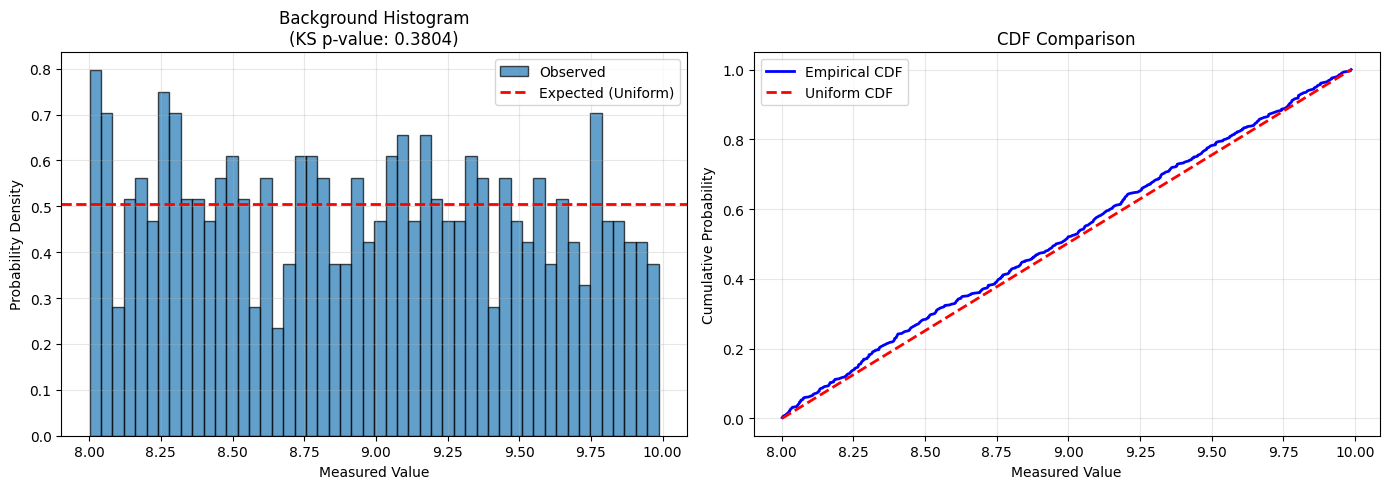

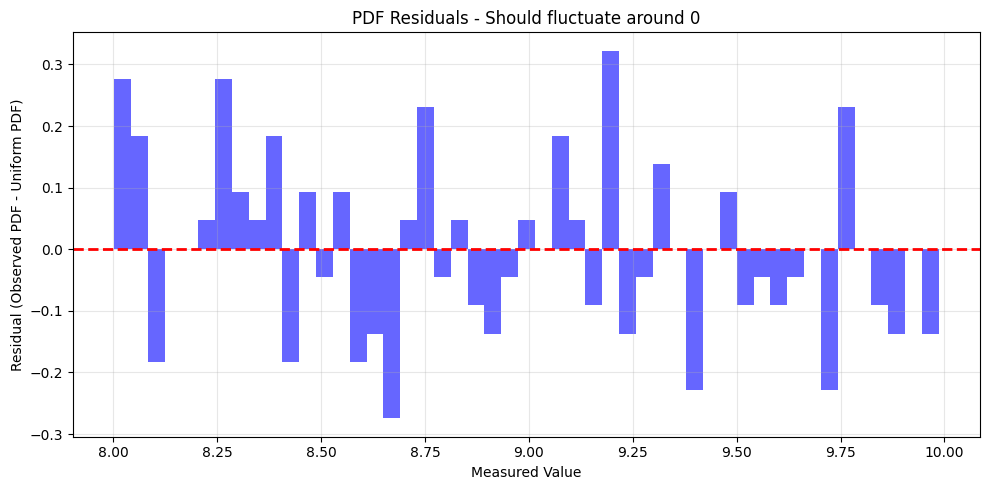


=== Summary Statistics ===
Mean: 8.955 (expected: 8.994)
Std dev: 0.576 (expected: 0.573)
Skewness: 0.044 (expected: 0 for uniform)
Kurtosis: -1.202 (expected: -1.2 for uniform)


In [531]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
background = data[(data >= 8) & (data < 10)]
# --- Background data ---
background = np.array(background)  # your data array

# --- Basic info ---
n_bg = len(background)
bg_min, bg_max = np.min(background), np.max(background)
print(f"Background data points: {n_bg}")
print(f"Background range: [{bg_min:.3f}, {bg_max:.3f}]")

# --- Chi-square test ---
n_bins_test = 20
observed_counts, bin_edges = np.histogram(background, bins=n_bins_test)
expected_counts = np.full(n_bins_test, n_bg / n_bins_test)

chi2_stat, chi2_pvalue = stats.chisquare(observed_counts, expected_counts)
print(f"\n=== Chi-Square Test for Uniformity ===")
print(f"Chi-square statistic: {chi2_stat:.3f}")
print(f"p-value: {chi2_pvalue:.4f}")
print(f"Conclusion: {'Uniform' if chi2_pvalue > 0.05 else 'NOT uniform'} (α=0.05)")

# --- Kolmogorov-Smirnov test ---
ks_stat, ks_pvalue = stats.kstest(
    background,
    stats.uniform(loc=bg_min, scale=bg_max - bg_min).cdf
)
print(f"\n=== Kolmogorov-Smirnov Test for Uniformity ===")
print(f"KS statistic: {ks_stat:.4f}")
print(f"p-value: {ks_pvalue:.4f}")
print(f"Conclusion: {'Uniform' if ks_pvalue > 0.05 else 'NOT uniform'} (α=0.05)")

# --- Histogram + PDF ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with uniform PDF
axes[0].hist(background, bins=50, density=True, alpha=0.7,
             edgecolor='black', label='Observed')
uniform_height = 1 / (bg_max - bg_min)
axes[0].axhline(uniform_height, color='red', linestyle='--', linewidth=2,
                label='Expected (Uniform)')
axes[0].set_xlabel('Measured Value')
axes[0].set_ylabel('Probability Density')
axes[0].set_title(f'Background Histogram\n(KS p-value: {ks_pvalue:.4f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Empirical CDF vs theoretical uniform CDF
sorted_bg = np.sort(background)
empirical_cdf = np.arange(1, n_bg+1) / n_bg
theoretical_cdf = (sorted_bg - bg_min) / (bg_max - bg_min)

axes[1].plot(sorted_bg, empirical_cdf, 'b-', linewidth=2, label='Empirical CDF')
axes[1].plot(sorted_bg, theoretical_cdf, 'r--', linewidth=2, label='Uniform CDF')
axes[1].set_xlabel('Measured Value')
axes[1].set_ylabel('Cumulative Probability')
axes[1].set_title('CDF Comparison')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('background_distribution.png', dpi=600)
plt.show()

# --- Residuals centered at 0 ---
bin_edges_res = np.linspace(bg_min, bg_max, 50)
bin_centers_res = 0.5 * (bin_edges_res[:-1] + bin_edges_res[1:])
empirical_hist, _ = np.histogram(background, bins=bin_edges_res, density=True)
uniform_pdf = np.full_like(empirical_hist, uniform_height)
residuals = empirical_hist - uniform_pdf

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(bin_centers_res, residuals, width=bin_edges_res[1]-bin_edges_res[0],
       color='blue', alpha=0.6)
ax.axhline(0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Measured Value')
ax.set_ylabel('Residual (Observed PDF - Uniform PDF)')
ax.set_title('PDF Residuals - Should fluctuate around 0')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('background_residuals.png', dpi=600)
plt.show()

# --- Summary statistics ---
mean_bg = np.mean(background)
std_bg = np.std(background)
skew_bg = stats.skew(background)
kurt_bg = stats.kurtosis(background)

expected_mean = (bg_max + bg_min) / 2
expected_std = (bg_max - bg_min) / np.sqrt(12)

print(f"\n=== Summary Statistics ===")
print(f"Mean: {mean_bg:.3f} (expected: {expected_mean:.3f})")
print(f"Std dev: {std_bg:.3f} (expected: {expected_std:.3f})")
print(f"Skewness: {skew_bg:.3f} (expected: 0 for uniform)")
print(f"Kurtosis: {kurt_bg:.3f} (expected: -1.2 for uniform)")


In [532]:
# # If background is not uniform, you need to model it differently

# # Option 1: Fit a polynomial to the background
# from numpy.polynomial import Polynomial

# # Sort for fitting
# x_bg = sorted_bg
# y_bg = np.arange(len(sorted_bg))

# # Fit polynomial (try degree 2 or 3)
# poly_fit = Polynomial.fit(x_bg, y_bg, deg=3)

# plt.figure(figsize=(10, 6))
# plt.hist(background, bins=50, density=True, alpha=0.7, label='Data')
# # Plot fitted background
# x_plot = np.linspace(np.min(background), np.max(background), 100)
# plt.plot(x_plot, poly_fit.deriv()(x_plot) / len(background), 
#          'r-', linewidth=2, label='Polynomial fit')
# plt.xlabel('Measured Value')
# plt.ylabel('Density')
# plt.title('Non-uniform background with polynomial model')
# plt.legend()
# plt.grid(alpha=0.3)

# # Option 2: Use kernel density estimation
# from scipy.stats import gaussian_kde
# kde = gaussian_kde(background)

# plt.figure(figsize=(10, 6))
# plt.hist(background, bins=50, density=True, alpha=0.7, label='Data')
# plt.plot(x_plot, kde(x_plot), 'r-', linewidth=2, label='KDE fit')
# plt.xlabel('Measured Value')
# plt.ylabel('Density')
# plt.title('Non-uniform background with KDE')
# plt.legend()
# plt.grid(alpha=0.3)

In [533]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit import cost
from scipy import stats

In [534]:
# # Load data
# data = np.loadtxt('data_InconstantBackground.csv', delimiter=',', skiprows=1)

# # Create histogram to fit
# n_bins = 200
# counts, bin_edges = np.histogram(data, bins=n_bins, range=(data.min(), data.max()))
# bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# bin_width = bin_edges[1] - bin_edges[0]

# # Calculate uncertainties (Poisson)
# counts_err = np.sqrt(counts)
# counts_err[counts_err == 0] = 1  # Avoid division by zero

# # Define model: 3 Gaussians + background
# def model(x, N1, mu1, sigma1, N2, mu2, sigma2, N3, mu3, sigma3, bg0, bg1):
#     """
#     Three Gaussian peaks plus linear background
    
#     Parameters:
#     - N1, N2, N3: amplitudes of the three peaks
#     - mu1, mu2, mu3: mean positions (centers) of the peaks
#     - sigma1, sigma2, sigma3: widths of the peaks
#     - bg0, bg1: constant and linear background terms
#     """
#     gauss1 = N1 * np.exp(-0.5 * ((x - mu1) / sigma1)**2)
#     gauss2 = N2 * np.exp(-0.5 * ((x - mu2) / sigma2)**2)
#     gauss3 = N3 * np.exp(-0.5 * ((x - mu3) / sigma3)**2)
#     background = bg0 + bg1 * x
    
#     return gauss1 + gauss2 + gauss3 + background

# # Initial parameter guesses
# initial_params = {
#     'N1': 600,      # Amplitude of peak 1
#     'mu1': 0.95,     # Position of peak 1
#     'sigma1': 0.1,  # Width of peak 1
#     'N2': 300,      # Amplitude of peak 2
#     'mu2': 3.4,     # Position of peak 2
#     'sigma2': 0.2,  # Width of peak 2
#     'N3': 200,      # Amplitude of peak 3
#     'mu3': 5.9,     # Position of peak 3
#     'sigma3': 0.2,  # Width of peak 3
#     'bg0': 50,      # Constant background
#     'bg1': -3,      # Linear background slope
# }


# # Create cost function (chi-square)
# chi2_cost = cost.LeastSquares(bin_centers, counts, counts_err, model)

# # Create Minuit object and fit
# m = Minuit(chi2_cost, **initial_params)

# m.migrad()  # Perform the fit
# m.hesse()   # Calculate uncertainties


In [535]:
# Load data
data = np.loadtxt('data_InconstantBackground.csv', delimiter=',', skiprows=1)

# Use fewer bins
n_bins = 200
counts, bin_edges = np.histogram(data, bins=n_bins, range=(data.min(), data.max()))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Poisson uncertainties
counts_err = np.sqrt(counts)
counts_err[counts_err == 0] = 1

# Model: 3 sharp Gaussians + quadratic background (to capture curvature)
def model(x, N1, mu1, sigma1, N2, mu2, sigma2, N3, mu3, sigma3, bg0, bg1, bg2):
    """Three sharp peaks + quadratic background to model non-linear decrease"""
    gauss1 = N1 * np.exp(-0.5 * ((x - mu1) / sigma1)**2)
    gauss2 = N2 * np.exp(-0.5 * ((x - mu2) / sigma2)**2)
    gauss3 = N3 * np.exp(-0.5 * ((x - mu3) / sigma3)**2)
    background = bg0 + bg1 * x + bg2 * x**2  # Quadratic to capture curvature
    return gauss1 + gauss2 + gauss3 + background

# Better initial guesses
initial_params = {
    'N1': 1500,     # Higher amplitude
    'mu1': 0.9,    # Adjusted position (you said it shifts left)
    'sigma1': 0.12, # Keep narrow
    'N2': 300,      
    'mu2': 3.4,     
    'sigma2': 0.18, 
    'N3': 200,      
    'mu3': 5.9,     
    'sigma3': 0.18, 
    'bg0': 80,      # Higher background at low x
    'bg1': -10,     # Negative slope
    'bg2': 0.5,     # Positive curvature (to flatten at high x)
}

# Fit
chi2_cost = cost.LeastSquares(bin_centers, counts, counts_err, model)
m = Minuit(chi2_cost, **initial_params)
m.errordef = Minuit.LEAST_SQUARES

# Set limits to keep peaks sharp (not fitting background structure)
m.limits['sigma1'] = (0.05, 0.25)
m.limits['sigma2'] = (0.05, 0.35)
m.limits['sigma3'] = (0.05, 0.35)
m.limits['mu1'] = (0.7, 1.1)   # Constrain peak positions
m.limits['mu2'] = (3.0, 3.8)
m.limits['mu3'] = (5.5, 6.3)

print("Fitting...")
m.migrad()
m.hesse()


Fitting...


c:\Users\villa\Desktop\AppStat25\.venv\Lib\site-packages\iminuit\minuit.py:149: ErrordefAlreadySetWarning: cost function has an errordef attribute equal to 1.0, you should not override this with Minuit.errordef
  warnings.warn(msg, ErrordefAlreadySetWarning)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1727 (χ²/ndof = 9.2)       │             Nfcn = 1317              │
│ EDM = 5.99e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │    209    │    15     │            │            │         │         │       │
│ 1 │ mu1    │   0.929   │   0.004   │            │            │   0.7   │   1.1   │       │
│ 2 │ sigma1 │  50.0e-3  │  0.8e-3   │            │            │  0.05   │  0.25   │       │
│ 3 │ N2     │    141    │    12     │            │            │         │         │       │
│ 4 │ mu2    │   3.417   │   0.004   │            │            │    3    │   3.8   │       │
│ 5 │ sigma2 │  50.0e-3  │  0.4e-3   │            │            │  0.05   │  0.35   │       │
│ 6 │ N3     │    156    │    10     │            │            │         │         │       │
│ 7 │ mu3    │   5.923   │   0.005   │            │            │   5.5   │   6.3   │       │
│ 8 │ sigma3 │   0.078   │   0.005   │            │            │  0.05   │  0.35   │       │
│ 9 │ bg0    │   278.2   │    2.9    │            │            │         │         │       │
│ 10│ bg1    │   -58.3   │    1.0    │            │            │         │         │       │
│ 11│ bg2    │   3.20    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│        │          N1         mu1      sigma1          N2         mu2      sigma2          N3         mu3      sigma3         bg0         bg1         bg2 │
├────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     N1 │         237   -4.536e-3  55.6834e-9           0   -0.088e-3   151.2e-12          -0   -0.090e-3   -0.339e-3         -10         2.9      -0.199 │
│    mu1 │   -4.536e-3     1.6e-05   -15.7e-12   -0.100e-3           0          -0    0.005e-3           0           0    0.309e-3   -0.096e-3    0.007e-3 │
│ sigma1 │  55.6834e-9   -15.7e-12    1.16e-12  -435.7e-12           0          -0     8.3e-12           0           0   1.1181e-9  -328.1e-12    22.6e-12 │
│     N2 │           0   -0.100e-3  -435.7e-12         136   -1.223e-3 -16.1746e-9           0   -0.007e-3    0.778e-3          -3         0.3      -0.005 │
│    mu2 │   -0.088e-3           0           0   -1.223e-3    1.46e-05     1.0e-12           0           0           0    0.074e-3   -0.021e-3    0.001e-3 │
│ sigma2 │   151.2e-12          -0          -0 -16.1746e-9     1.0e-12    3.75e-13     8.2e-12          -0           0  -108.3e-12    13.5e-12    -0.1e-12 │
│     N3 │          -0    0.005e-3     8.3e-12           0           0     8.2e-12         101   -1.514e-3  -28.726e-3           0        -0.1       0.011 │
│    mu3 │   -0.090e-3        


χ²/ndf = 1726.9/188 = 9.19


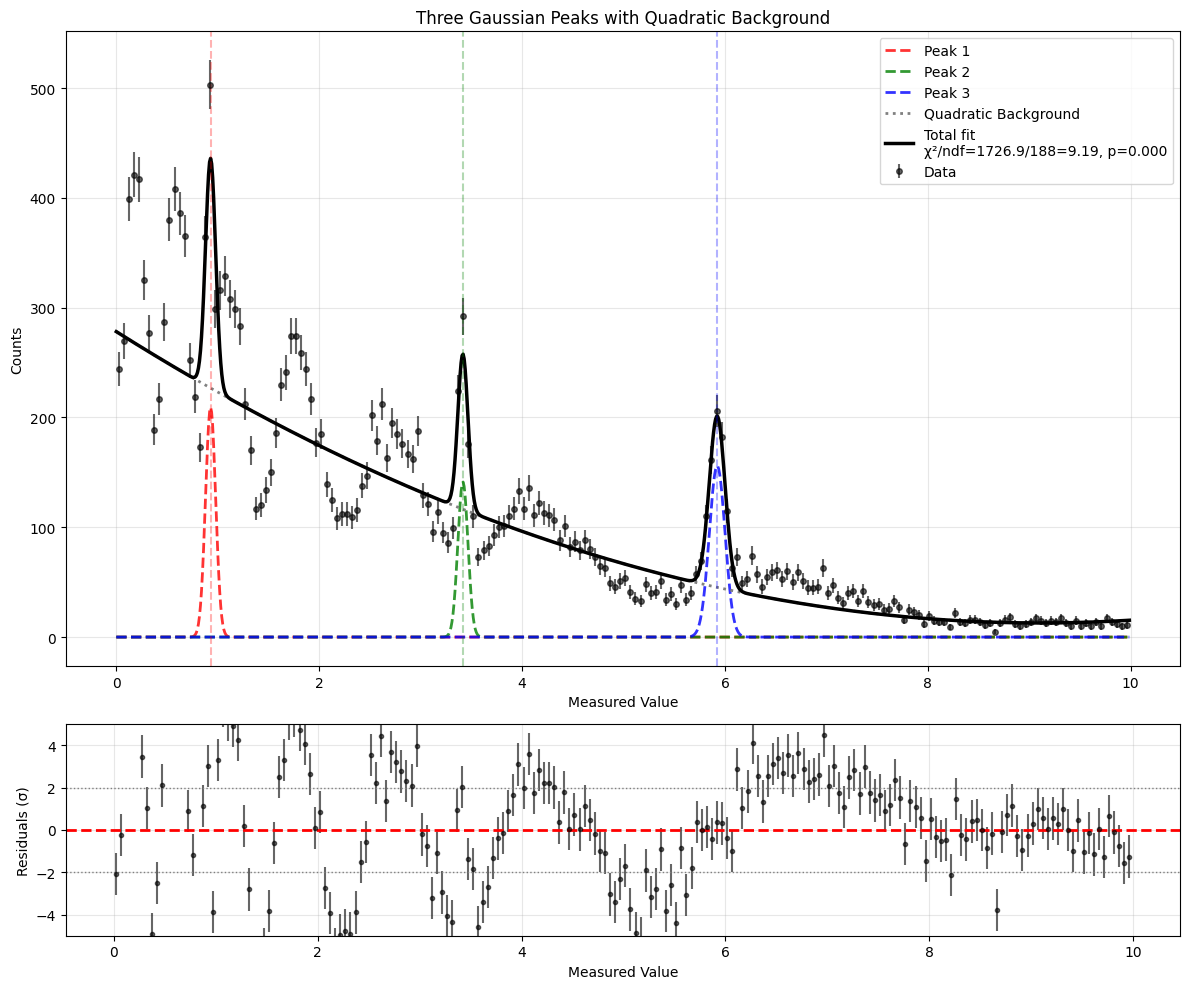

In [544]:

# Results
# print("\n" + "="*60)
# print("FIT RESULTS")
# print("="*60)
# print(m.params)
print(f"\nχ²/ndf = {m.fval:.1f}/{len(bin_centers) - m.nfit} = {m.fval/(len(bin_centers)-m.nfit):.2f}")

params = m.values
from scipy.stats import chi2

# χ² and ndf
chi2_val = m.fval
ndf = len(bin_centers) - m.nfit
chi2_ndf = chi2_val / ndf

# p-value
p_val = 1 - chi2.cdf(chi2_val, ndf)
# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), 
                                gridspec_kw={'height_ratios': [3, 1]})

ax1.errorbar(bin_centers, counts, yerr=counts_err, fmt='ko', 
             markersize=4, label='Data', alpha=0.6)

x_smooth = np.linspace(data.min(), data.max(), 1000)
gauss1 = params['N1'] * np.exp(-0.5 * ((x_smooth - params['mu1']) / params['sigma1'])**2)
gauss2 = params['N2'] * np.exp(-0.5 * ((x_smooth - params['mu2']) / params['sigma2'])**2)
gauss3 = params['N3'] * np.exp(-0.5 * ((x_smooth - params['mu3']) / params['sigma3'])**2)
background = params['bg0'] + params['bg1'] * x_smooth + params['bg2'] * x_smooth**2

ax1.plot(x_smooth, gauss1, 'r--', linewidth=2, alpha=0.8, label='Peak 1')
ax1.plot(x_smooth, gauss2, 'g--', linewidth=2, alpha=0.8, label='Peak 2')
ax1.plot(x_smooth, gauss3, 'b--', linewidth=2, alpha=0.8, label='Peak 3')
ax1.plot(x_smooth, background, 'gray', linewidth=2, linestyle=':', label='Quadratic Background')
ax1.plot(x_smooth, model(x_smooth, *params), 'k-', linewidth=2.5, label=f'Total fit\nχ²/ndf={chi2_val:.1f}/{ndf}={chi2_ndf:.2f}, p={p_val:.3f}'
)

ax1.axvline(params['mu1'], color='red', linestyle='--', alpha=0.3)
ax1.axvline(params['mu2'], color='green', linestyle='--', alpha=0.3)
ax1.axvline(params['mu3'], color='blue', linestyle='--', alpha=0.3)

ax1.set_xlabel('Measured Value')
ax1.set_ylabel('Counts')
ax1.set_title('Three Gaussian Peaks with Quadratic Background')
# ax1.plot(
#     x_smooth, 
#     model(x_smooth, *params), 
#     'k-', 
#     linewidth=2.5, 
#     label=f'Total fit\nχ²/ndf={chi2_val:.1f}/{ndf}={chi2_ndf:.2f}, p={p_val:.3f}'
# )

ax1.legend()
ax1.grid(alpha=0.3)

# Residuals
fitted_counts = model(bin_centers, *params)
residuals = (counts - fitted_counts) / counts_err

ax2.errorbar(bin_centers, residuals, yerr=1, fmt='ko', markersize=3, alpha=0.6)
ax2.axhline(0, color='red', linestyle='--', linewidth=2)
ax2.axhline(2, color='gray', linestyle=':', linewidth=1)
ax2.axhline(-2, color='gray', linestyle=':', linewidth=1)
ax2.set_xlabel('Measured Value')
ax2.set_ylabel('Residuals (σ)')
ax2.grid(alpha=0.3)
ax2.set_ylim(-5, 5)

plt.tight_layout()
plt.savefig('fit',dpi=600)
# Peak info
# print("\n" + "="*60)
# print("PEAK INFORMATION")
# print("="*60)
# for i in range(1, 4):
#     print(f"\nPeak {i}:")
#     print(f"  Position: {params[f'mu{i}']:.3f} ± {m.errors[f'mu{i}']:.3f}")
#     print(f"  Width (σ): {params[f'sigma{i}']:.3f} ± {m.errors[f'sigma{i}']:.3f}")
#     print(f"  Amplitude: {params[f'N{i}']:.1f} ± {m.errors[f'N{i}']:.1f}")

ValueError: x and y must have same first dimension, but have shapes (1000,) and (538,)

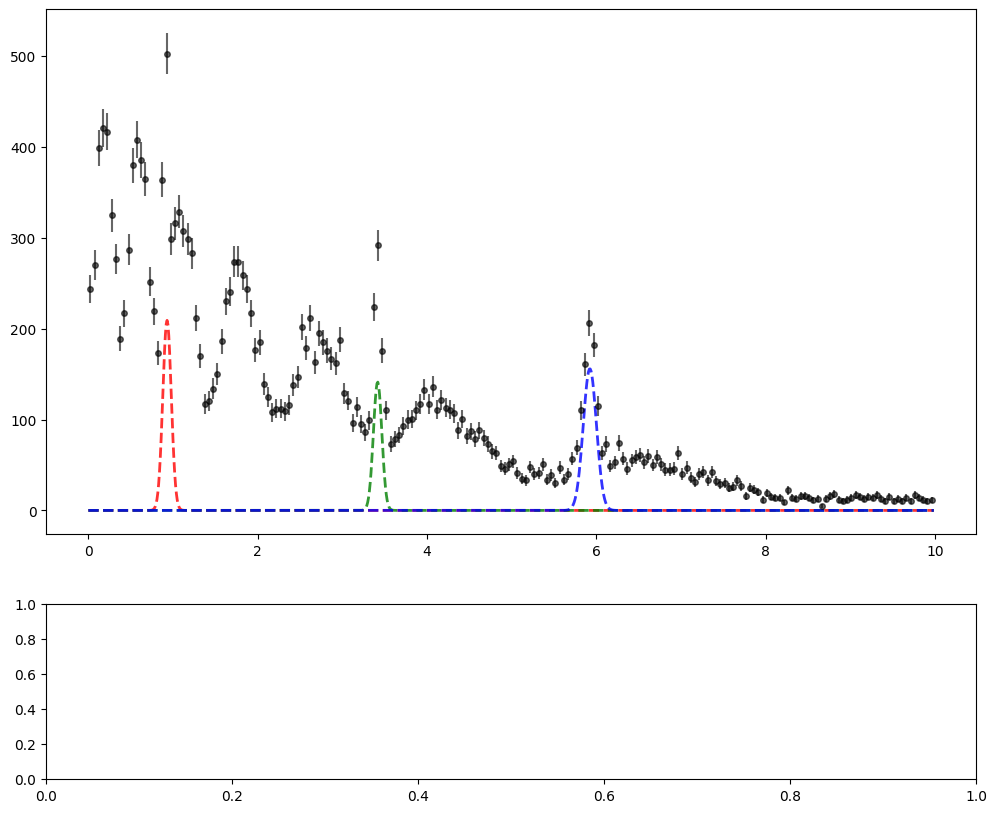

In [538]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np

# --- Compute chi-square and p-value ---
params = m.values
fitted_counts = model(bin_centers, *params)
chi2_val = np.sum(((counts - fitted_counts)/counts_err)**2)
ndf = len(bin_centers) - m.nfit
p_value = 1 - chi2.cdf(chi2_val, ndf)

chi2_text = f"$\\chi^2/\\mathrm{{ndf}} = {chi2_val:.1f}/{ndf} = {chi2_val/ndf:.2f}$"
p_text = f"$p = {p_value:.4f}$"

# --- Peak parameter strings ---
peak_texts = []
for i, color in zip(range(1,4), ['red','green','blue']):
    mu = params[f'mu{i}']
    mu_err = m.errors[f'mu{i}']
    sigma = params[f'sigma{i}']
    sigma_err = m.errors[f'sigma{i}']
    N = params[f'N{i}']
    N_err = m.errors[f'N{i}']
    peak_texts.append(
        f"Peak {i}: $\\mu={mu:.3f}\\pm{mu_err:.3f},\\ \\sigma={sigma:.3f}\\pm{sigma_err:.3f},\\ N={N:.1f}\\pm{N_err:.1f}$"
    )

# --- Combine legend entries ---
full_legend = [chi2_text, p_text] + peak_texts + ["Quadratic Background"]

# --- Create figure with two subplots ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), 
                                gridspec_kw={'height_ratios': [3, 1]})

# --- Top subplot: data and fits ---
ax1.errorbar(bin_centers, counts, yerr=counts_err, fmt='ko', markersize=4, label='Data', alpha=0.6)

x_smooth = np.linspace(data.min(), data.max(), 1000)

ax1.plot(x_smooth, gauss1, 'r--', linewidth=2, alpha=0.8)
ax1.plot(x_smooth, gauss2, 'g--', linewidth=2, alpha=0.8)
ax1.plot(x_smooth, gauss3, 'b--', linewidth=2, alpha=0.8)
ax1.plot(x_smooth, background, 'gray', linewidth=2, linestyle=':')
ax1.plot(x_smooth, model(x_smooth, *params), 'k-', linewidth=2.5)

# Vertical lines at peak centers
ax1.axvline(params['mu1'], color='red', linestyle='--', alpha=0.3)
ax1.axvline(params['mu2'], color='green', linestyle='--', alpha=0.3)
ax1.axvline(params['mu3'], color='blue', linestyle='--', alpha=0.3)

ax1.set_xlabel('Measured Value')
ax1.set_ylabel('Counts')
ax1.set_title('Three Gaussian Peaks with Quadratic Background')
ax1.legend(full_legend, fontsize=9, loc='upper right')
ax1.grid(alpha=0.3)

# --- Bottom subplot: residuals ---
residuals = (counts - fitted_counts) / counts_err
ax2.errorbar(bin_centers, residuals, yerr=1, fmt='ko', markersize=3, alpha=0.6)
ax2.axhline(0, color='red', linestyle='--', linewidth=2)
ax2.axhline(2, color='gray', linestyle=':', linewidth=1)
ax2.axhline(-2, color='gray', linestyle=':', linewidth=1)
ax2.set_xlabel('Measured Value')
ax2.set_ylabel('Residuals (σ)')
ax2.set_ylim(-5, 5)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('bigfit', dpi=600)
plt.show()



PEAK INTENSITY COMPARISON

Peak 1: 26.2 ± 2.0 counts
Peak 2: 17.7 ± 1.5 counts
Peak 3: 30.4 ± 2.6 counts

PAIRWISE COMPARISONS

Peak 1 vs Peak 2:
  Difference: 8.5 ± 2.5
  z-score: 3.46
  p-value: 0.0005
  Conclusion: DIFFERENT intensity (α=0.05)

Peak 1 vs Peak 3:
  Difference: -4.1 ± 3.3
  z-score: -1.26
  p-value: 0.2089
  Conclusion: SAME intensity (α=0.05)

Peak 2 vs Peak 3:
  Difference: -12.7 ± 3.0
  z-score: -4.18
  p-value: 0.0000
  Conclusion: DIFFERENT intensity (α=0.05)

OVERALL CONCLUSION
✗ The peaks do NOT have equal intensities
  - Peak 1 and Peak 2 differ significantly
  - Peak 2 and Peak 3 differ significantly


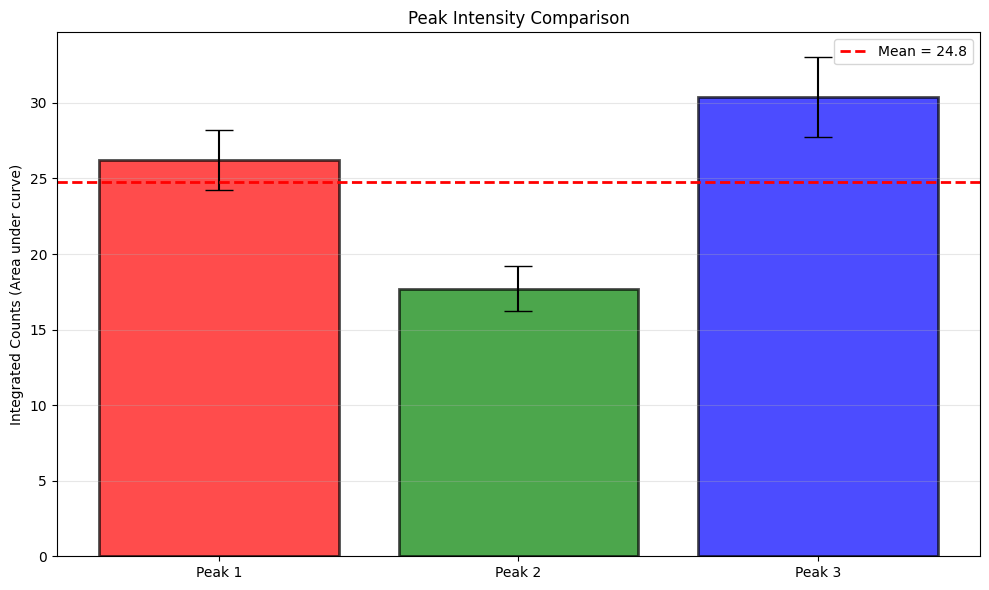

In [ ]:
# After your fit, calculate integrated counts for each peak
# For a Gaussian: Integral = N * sigma * sqrt(2*pi)

print("\n" + "="*60)
print("PEAK INTENSITY COMPARISON")
print("="*60)

# Calculate integrated counts (areas) for each peak
area1 = params['N1'] * params['sigma1'] * np.sqrt(2 * np.pi)
area2 = params['N2'] * params['sigma2'] * np.sqrt(2 * np.pi)
area3 = params['N3'] * params['sigma3'] * np.sqrt(2 * np.pi)

# Calculate uncertainties using error propagation
# δArea = sqrt( (∂Area/∂N)² σ_N² + (∂Area/∂σ)² σ_σ² )
# where ∂Area/∂N = σ√(2π) and ∂Area/∂σ = N√(2π)

sqrt_2pi = np.sqrt(2 * np.pi)
area1_err = np.sqrt(
    (params['sigma1'] * sqrt_2pi * m.errors['N1'])**2 + 
    (params['N1'] * sqrt_2pi * m.errors['sigma1'])**2
)
area2_err = np.sqrt(
    (params['sigma2'] * sqrt_2pi * m.errors['N2'])**2 + 
    (params['N2'] * sqrt_2pi * m.errors['sigma2'])**2
)
area3_err = np.sqrt(
    (params['sigma3'] * sqrt_2pi * m.errors['N3'])**2 + 
    (params['N3'] * sqrt_2pi * m.errors['sigma3'])**2
)

print(f"\nPeak 1: {area1:.1f} ± {area1_err:.1f} counts")
print(f"Peak 2: {area2:.1f} ± {area2_err:.1f} counts")
print(f"Peak 3: {area3:.1f} ± {area3_err:.1f} counts")

# Test if peaks have equal intensity
# H0: All peaks have same intensity
# Compare pairwise using z-test

def compare_intensities(area_i, err_i, area_j, err_j, name_i, name_j):
    diff = area_i - area_j
    diff_err = np.sqrt(err_i**2 + err_j**2)
    z_score = diff / diff_err
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed
    
    print(f"\n{name_i} vs {name_j}:")
    print(f"  Difference: {diff:.1f} ± {diff_err:.1f}")
    print(f"  z-score: {z_score:.2f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Conclusion: {'SAME intensity' if p_value > 0.05 else 'DIFFERENT intensity'} (α=0.05)")
    
    return z_score, p_value

print("\n" + "="*60)
print("PAIRWISE COMPARISONS")
print("="*60)

z12, p12 = compare_intensities(area1, area1_err, area2, area2_err, "Peak 1", "Peak 2")
z13, p13 = compare_intensities(area1, area1_err, area3, area3_err, "Peak 1", "Peak 3")
z23, p23 = compare_intensities(area2, area2_err, area3, area3_err, "Peak 2", "Peak 3")

# Overall conclusion
print("\n" + "="*60)
print("OVERALL CONCLUSION")
print("="*60)
if p12 > 0.05 and p13 > 0.05 and p23 > 0.05:
    print("✓ All three peaks have statistically EQUAL intensities")
else:
    print("✗ The peaks do NOT have equal intensities")
    if p12 <= 0.05:
        print(f"  - Peak 1 and Peak 2 differ significantly")
    if p13 <= 0.05:
        print(f"  - Peak 1 and Peak 3 differ significantly")
    if p23 <= 0.05:
        print(f"  - Peak 2 and Peak 3 differ significantly")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
peaks = ['Peak 1', 'Peak 2', 'Peak 3']
areas = [area1, area2, area3]
errors = [area1_err, area2_err, area3_err]

x_pos = np.arange(len(peaks))
ax.bar(x_pos, areas, yerr=errors, alpha=0.7, capsize=10, 
       color=['red', 'green', 'blue'], edgecolor='black', linewidth=2)
ax.set_xticks(x_pos)
ax.set_xticklabels(peaks)
ax.set_ylabel('Integrated Counts (Area under curve)')
ax.set_title('Peak Intensity Comparison')
ax.grid(alpha=0.3, axis='y')

# Add horizontal line at mean
mean_area = np.mean(areas)
ax.axhline(mean_area, color='red', linestyle='--', linewidth=2, 
           label=f'Mean = {mean_area:.1f}')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Load data
data = np.loadtxt('data_InconstantBackground.csv', delimiter=',', skiprows=1)

# Create histogram to fit
n_bins = 200
counts, bin_edges = np.histogram(data, bins=n_bins, range=(data.min(), data.max()))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

# Calculate uncertainties (Poisson)
counts_err = np.sqrt(counts)
counts_err[counts_err == 0] = 1  # Avoid division by zero

# Define model: 3 Gaussians + background
def model(x, N1, mu1, sigma1, N2, mu2, sigma2, N3, mu3, sigma3, bg0, bg1, N4, mu4, sigma4, N5, mu5, sigma5, N6, mu6, sigma6, N7, mu7, sigma7, N8, mu8, sigma8, N9, mu9, sigma9, N10, mu10, sigma10):
    """
    Three Gaussian peaks plus linear background
    
    Parameters:
    - N1, N2, N3: amplitudes of the three peaks
    - mu1, mu2, mu3: mean positions (centers) of the peaks
    - sigma1, sigma2, sigma3: widths of the peaks
    - bg0, bg1: constant and linear background terms
    """
    gauss1 = N1 * np.exp(-0.5 * ((x - mu1) / sigma1)**2)
    gauss2 = N2 * np.exp(-0.5 * ((x - mu2) / sigma2)**2)
    gauss3 = N3 * np.exp(-0.5 * ((x - mu3) / sigma3)**2)
    gauss4 = N4 * np.exp(-0.5 * ((x - mu4) / sigma4)**2)
    gauss5 = N5 * np.exp(-0.5 * ((x - mu5) / sigma5)**2)
    gauss6 = N6 * np.exp(-0.5 * ((x - mu6) / sigma6)**2)
    gauss7 = N7 * np.exp(-0.5 * ((x - mu7) / sigma7)**2)
    gauss8 = N8 * np.exp(-0.5 * ((x - mu8) / sigma8)**2)
    gauss9 = N9 * np.exp(-0.5 * ((x - mu9) / sigma9)**2)
    gauss10 = N10 * np.exp(-0.5 * ((x - mu10) / sigma10)**2)
    background = bg0 + bg1 * x
    
    return gauss1 + gauss2 + gauss3 + gauss4 + gauss5 + gauss6 + gauss7 + gauss8 + gauss9 + gauss10 + background

# Initial parameter guesses
initial_params = {
    'N1': 420,      # Amplitude of peak 1
    'mu1': 0.2,     # Position of peak 1
    'sigma1': 0.5,  # Width of peak 1
    'N2': 405,      # Amplitude of peak 2
    'mu2': 0.6,     # Position of peak 2
    'sigma2': 0.5,  # Width of peak 2
    'N3': 500,      # Amplitude of peak 3
    'mu3': 0.9,     # Position of peak 3
    'sigma3': 0.12,  # Width of peak 3
    'bg0': 50,      # Constant background
    'bg1': -3,      # Linear background slope
    'N4': 310,      # Amplitude of peak 4
    'mu4': 1.1,     # Position of peak 4
    'sigma4': 0.7,  # Width of peak 4
    'N5': 270,       # Amplitude of peak 5
    'mu5': 1.8,     # Position of peak 5
    'sigma5': 0.9,  # Width of peak 5
    'N6': 200,       # Amplitude of peak 6
    'mu6': 2.8,    # Position of peak 6
    'sigma6': 1,  # Width of peak 6
    'N7': 300,       # Amplitude of peak 7
    'mu7': 3.4,    # Position of peak 7
    'sigma7': 0.2,  # Width of peak 7
    'N8': 120,       # Amplitude of peak 8
    'mu8': 4.0,    # Position of peak 8
    'sigma8': 1.1,  # Width of peak 8
    'N9': 200,       # Amplitude of peak 9
    'mu9': 5.9,    # Position of peak 9
    'sigma9': 0.2,  # Width of peak 9
    'N10': 50,      # Amplitude of peak 10
    'mu10': 6.5,   # Position of peak 10
    'sigma10': 1.5,  # Width of peak 10

}


# Create cost function (chi-square)
chi2_cost = cost.LeastSquares(bin_centers, counts, counts_err, model)

# Create Minuit object and fit
m = Minuit(chi2_cost, **initial_params)

m.migrad()  # Perform the fit
m.hesse()   # Calculate uncertainties


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 863.2 (χ²/ndof = 5.1)      │             Nfcn = 9152              │
│ EDM = 1.46 (Goal: 0.0002)        │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1      │    282    │     8     │            │            │         │         │       │
│ 1 │ mu1     │   0.19    │   0.04    │            │            │         │         │       │
│ 2 │ sigma1  │   0.591   │   0.033   │            │            │         │         │       │
│ 3 │ N2      │  -2.2e3   │   1.5e3   │            │            │         │         │       │
│ 4 │ mu2     │   -0.20   │   0.04    │            │            │         │         │       │
│ 5 │ sigma2  │   0.086   │   0.013   │            │            │         │         │       │
│ 6 │ N3      │  0.09e9   │  0.04e9   │            │            │         │         │       │
│ 7 │ mu3     │ 901.1e-3  │  0.5e-3   │            │            │         │         │       │
│ 8 │ sigma3  │  4.46e-3  │  0.08e-3  │            │            │         │         │       │
│ 9 │ bg0     │   15.5    │    1.8    │            │            │         │         │       │
│ 10│ bg1     │   -0.33   │   0.20    │            │            │         │         │       │
│ 11│ N4      │    171    │    11     │            │            │         │         │       │
│ 12│ mu4     │   1.098   │   0.009   │            │            │         │         │       │
│ 13│ sigma4  │   0.123   │   0.008   │            │            │         │         │       │
│ 14│ N5      │    161    │     9     │            │            │         │         │       │
│ 15│ mu5     │   1.773   │   0.008   │            │            │         │         │       │
│ 16│ sigma5  │   0.138   │   0.007   │            │            │         │         │       │
│ 17│ N6      │   120.5   │    2.5    │            │            │         │         │       │
│ 18│ mu6     │   2.74    │   0.06    │            │            │         │         │       │
│ 19│ sigma6  │   1.48    │   0.05    │            │            │         │         │       │
│ 20│ N7      │  0.30e3   │  0.27e3   │            │            │         │         │       │
│ 21│ mu7     │   3.399   │   0.005   │            │            │         │         │       │
│ 22│ sigma7  │  -0.020   │   0.011   │            │            │         │         │       │
│ 23│ N8      │  0.12e3   │  0.11e3   │            │            │         │         │       │
│ 24│ mu8     │  3.9921   │  0.0031   │            │            │         │         │       │
│ 25│ sigma8  │   0.014   │   0.004   │            │            │         │         │       │
│ 26│ N9      │    157    │    10     │            │            │         │         │       │
│ 27│ mu9     │   5.918   │   0.004   │            │            │         │         │       │
│ 28│ sigma9  │   0.079   │   0.005   │            │            │         │         │       │
│ 29│ N10     │   38.6    │    1.9    │            │            │         │     

In [ ]:
from iminuit.cost import LeastSquares

In [ ]:
def gauss_bg(x, A, mu, sigma, c0, c1,c2):
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2) + c0 + c1 * x+c2*x**2

In [ ]:
data = np.loadtxt('data_InconstantBackground.csv', delimiter=',', skiprows=1)

n_bins = 1000
counts, bin_edges = np.histogram(data, bins=n_bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]

counts_err = np.sqrt(counts)
counts_err[counts_err == 0] = 1

In [ ]:
peaks = [
    {"name": "Peak 1", "mu": 0.9, "sigma": 0.12, "window": (0.7, 1.1), "A": 500},
    {"name": "Peak 2", "mu": 3.45, "sigma": 0.5,  "window": (3.0, 3.8), "A": 300},
    {"name": "Peak 3", "mu": 5.9, "sigma": 0.2,  "window": (5.5, 6.3), "A": 200},
]

Peak 1 valid fit: True


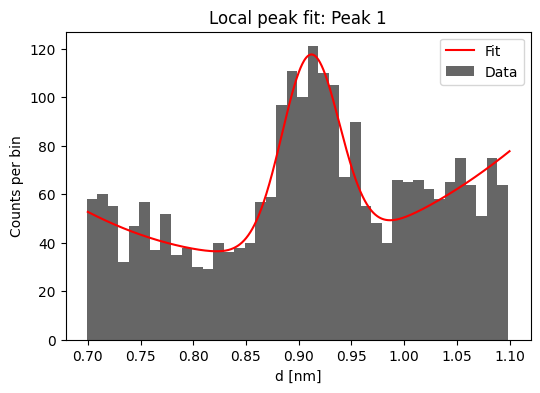

Peak 2 valid fit: True


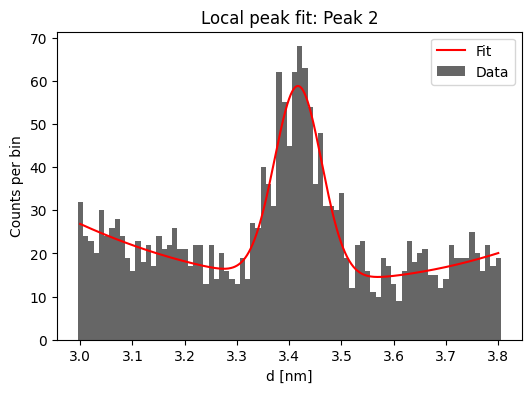

Peak 3 valid fit: True


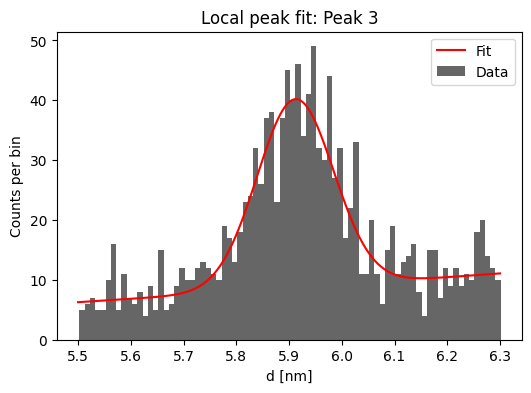

In [ ]:
fit_results = []

for p in peaks:
    # Select the bins within the peak window
    mask = (bin_centers > p["window"][0]) & (bin_centers < p["window"][1])
    x = bin_centers[mask]
    y = counts[mask]
    yerr = counts_err[mask]

    # Fit using Minuit
    cost = LeastSquares(x, y, yerr, gauss_bg)
    m = Minuit(
        cost,
        A=p["A"],
        mu=p["mu"],
        sigma=p["sigma"],
        c0=10,
        c1=0.1,
        c2=0.1
    )
    m.limits["sigma"] = (0.01, None)
    m.limits["A"] = (0, None)

    m.migrad()
    m.hesse()
    fit_results.append((p["name"], m))
    print(f"{p['name']} valid fit:", m.valid)

    # --- Plotting ---
    plt.figure(figsize=(6,4))

    # Plot the histogram using precomputed counts to match the fit
    plt.bar(
        x, y, width=bin_width, color='black', alpha=0.6, label='Data'
    )

    # Plot the fit on top
    x_fit = np.linspace(p['window'][0], p['window'][1], 1000)
    plt.plot(x_fit, gauss_bg(x_fit, *m.values), 'r-', label='Fit')

    plt.xlabel("d [nm]")
    plt.ylabel("Counts per bin")
    plt.title(f"Local peak fit: {p['name']}")
    plt.legend()
    plt.show()


Peak 1 valid fit: True
Peak 2 valid fit: True
Peak 3 valid fit: True


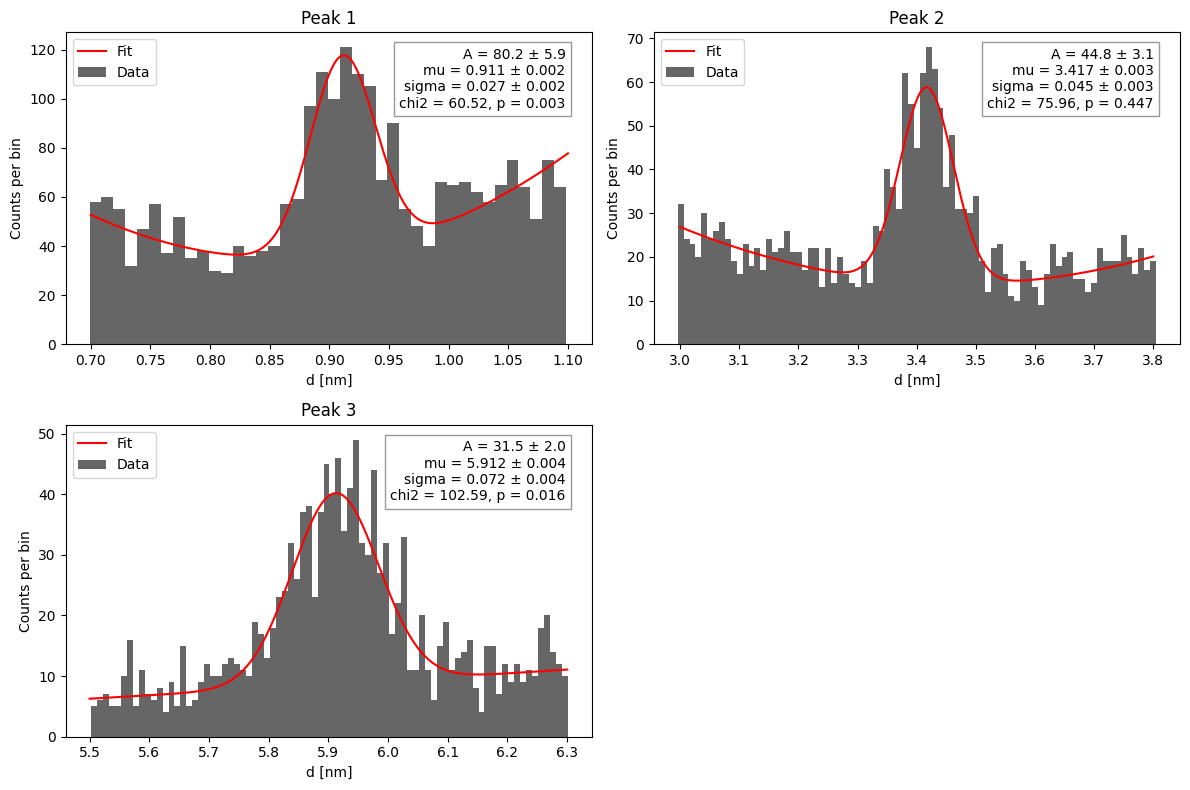

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

fit_results = []

n_peaks = len(peaks)
ncols = 2
nrows = ceil(n_peaks / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows))
axes = axes.flatten()

for i, p in enumerate(peaks):
    # Select bins in peak window
    mask = (bin_centers > p["window"][0]) & (bin_centers < p["window"][1])
    x = bin_centers[mask]
    y = counts[mask]
    yerr = counts_err[mask]

    # Fit using Minuit
    cost = LeastSquares(x, y, yerr, gauss_bg)
    m = Minuit(
        cost,
        A=p["A"],
        mu=p["mu"],
        sigma=p["sigma"],
        c0=10,
        c1=0.1,
        c2=0.1

    )
    m.limits["sigma"] = (0.01, None)
    m.limits["A"] = (0, None)
    m.migrad()
    m.hesse()
    fit_results.append((p["name"], m))
    print(f"{p['name']} valid fit:", m.valid)

    # --- Calculate chi-square and p-value ---
    y_fit = gauss_bg(x, *m.values)
    chi2 = np.sum(((y - y_fit) / yerr)**2)
    dof = len(y) - len(m.values)  # degrees of freedom
    p_val = 1 - stats.chi2.cdf(chi2, dof)

    # --- Plotting ---
    ax = axes[i]
    ax.bar(x, y, width=bin_width, color='black', alpha=0.6, label='Data')
    x_fit = np.linspace(p['window'][0], p['window'][1], 1000)
    ax.plot(x_fit, gauss_bg(x_fit, *m.values), 'r-', label='Fit')
    ax.set_xlabel("d [nm]")
    ax.set_ylabel("Counts per bin")
    ax.set_title(f"{p['name']}")
    ax.legend()

    # --- Annotate parameters, chi2, p-value ---
    textstr = (
        f"A = {m.values['A']:.1f} ± {m.errors['A']:.1f}\n"
        f"mu = {m.values['mu']:.3f} ± {m.errors['mu']:.3f}\n"
        f"sigma = {m.values['sigma']:.3f} ± {m.errors['sigma']:.3f}\n"
        f"chi2 = {chi2:.2f}, p = {p_val:.3f}"
    )
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig("peak_fits_with_chi2.png", dpi=600)
plt.show()


In [ ]:
print("\n=== Peak Intensities ===")

peak_counts = {}
for name, m in fit_results:
    mu = m.values["mu"]
    sigma = m.values["sigma"]
    
    mask = (data > mu - 2*sigma) & (data < mu + 2*sigma)
    n_points = np.sum(mask)
    peak_counts[name] = n_points
    print(f"{name}: {n_points} measurements within ±2σ")


=== Peak Intensities ===
Peak 1: 968 measurements within ±2σ
Peak 2: 779 measurements within ±2σ
Peak 3: 839 measurements within ±2σ


In [ ]:
n1 = peak_counts["Peak 1"]
n2 = peak_counts["Peak 2"]
n3 = peak_counts["Peak 3"]

# z-test for counts (Poisson approximation)
z12 = (n1 - n2) / np.sqrt(n1 + n2)
p_value = 2 * (1 - norm.cdf(abs(z12)))
z23 = (n2 - n3) / np.sqrt(n2 + n3)
p_value23 = 2 * (1 - norm.cdf(abs(z23)))

print(f"Peak 1 count: {n1}, Peak 2 count: {n2}")
print(f"z = {z12:.3f}, p-value = {p_value:.3f}")
print(f"Peak 2 count: {n2}, Peak 3 count: {n3}")
print(f"z = {z23:.3f}, p-value = {p_value23:.3f}")

Peak 1 count: 968, Peak 2 count: 779
z = 4.522, p-value = 0.000
Peak 2 count: 779, Peak 3 count: 839
z = -1.492, p-value = 0.136


PYRAMID ALIGNMENT: EAST vs WEST COMPARISON

--- Individual Pyramid Tests ---

Meidum      :
  East:   -20.6 ±  1.0 arcmin
  West:   -18.1 ±  1.0 arcmin
  Diff:    -2.5 ±  1.4 arcmin
  Z-score:  -1.77
  p-value: 0.0771
  → ✓ AGREE (α = 0.05)

Bent        :
  East:   -17.3 ±  0.2 arcmin
  West:   -11.8 ±  0.2 arcmin
  Diff:    -5.5 ±  0.3 arcmin
  Z-score: -19.45
  p-value: 0.0000
  → ✗ DISAGREE (α = 0.05)

Khufu       :
  East:    -3.4 ±  0.2 arcmin
  West:    -2.8 ±  0.2 arcmin
  Diff:    -0.6 ±  0.3 arcmin
  Z-score:  -2.12
  p-value: 0.0339
  → ✗ DISAGREE (α = 0.05)

Khafre      :
  East:     6.0 ±  0.2 arcmin
  West:     6.0 ±  0.2 arcmin
  Diff:     0.0 ±  0.3 arcmin
  Z-score:   0.00
  p-value: 1.0000
  → ✓ AGREE (α = 0.05)

Menkaure    :
  East:    12.4 ±  1.0 arcmin
  West:    14.1 ±  1.8 arcmin
  Diff:    -1.7 ±  2.1 arcmin
  Z-score:  -0.83
  p-value: 0.4090
  → ✓ AGREE (α = 0.05)

OVERALL CHI-SQUARE TEST

χ² statistic: 386.43
Degrees of freedom: 5
p-value: 0.0000

✗ Overall: 

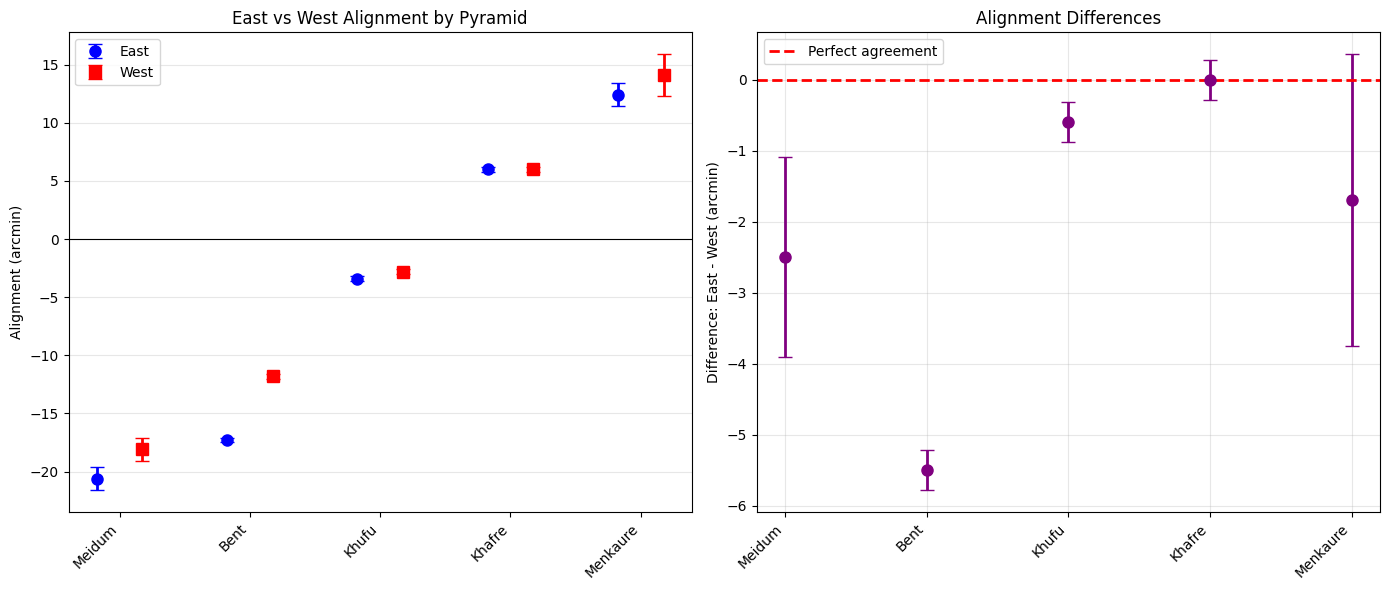


SUMMARY TABLE
Pyramid          East     West     Diff   σ_diff      Z  p-value   Agree?
----------------------------------------------------------------------
Meidum         -20.6    -18.1     -2.5     1.41   -1.77   0.0771       Yes
Bent           -17.3    -11.8     -5.5     0.28  -19.45   0.0000        No
Khufu           -3.4     -2.8     -0.6     0.28   -2.12   0.0339        No
Khafre           6.0      6.0      0.0     0.28    0.00   1.0000       Yes
Menkaure        12.4     14.1     -1.7     2.06   -0.83   0.4090       Yes


In [ ]:
# Pyramid alignment data
pyramids = ['Meidum', 'Bent', 'Khufu', 'Khafre', 'Menkaure']

# East alignments (arc minutes)
east_align = np.array([-20.6, -17.3, -3.4, 6.0, 12.4])
east_err = np.array([1.0, 0.2, 0.2, 0.2, 1.0])

# West alignments (arc minutes)
west_align = np.array([-18.1, -11.8, -2.8, 6.0, 14.1])
west_err = np.array([1.0, 0.2, 0.2, 0.2, 1.8])

# Note: Red pyramid, Sahure, and Neferirkare don't have both measurements

print("="*70)
print("PYRAMID ALIGNMENT: EAST vs WEST COMPARISON")
print("="*70)

# Test each pyramid individually
print("\n--- Individual Pyramid Tests ---")
z_scores = []
p_values = []

for i, name in enumerate(pyramids):
    # Difference between East and West
    diff = east_align[i] - west_align[i]
    
    # Combined uncertainty (independent measurements)
    diff_err = np.sqrt(east_err[i]**2 + west_err[i]**2)
    
    # Z-test: is difference consistent with zero?
    z = diff / diff_err
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))  # Two-tailed
    
    z_scores.append(z)
    p_values.append(p_value)
    
    agreement = "✓ AGREE" if p_value > 0.05 else "✗ DISAGREE"
    
    print(f"\n{name:12s}:")
    print(f"  East:  {east_align[i]:6.1f} ± {east_err[i]:4.1f} arcmin")
    print(f"  West:  {west_align[i]:6.1f} ± {west_err[i]:4.1f} arcmin")
    print(f"  Diff:  {diff:6.1f} ± {diff_err:4.1f} arcmin")
    print(f"  Z-score: {z:6.2f}")
    print(f"  p-value: {p_value:6.4f}")
    print(f"  → {agreement} (α = 0.05)")

# Overall chi-square test
print("\n" + "="*70)
print("OVERALL CHI-SQUARE TEST")
print("="*70)

# Chi-square statistic: sum of squared z-scores
chi2_stat = np.sum(np.array(z_scores)**2)
n_pairs = len(pyramids)
dof = n_pairs  # Degrees of freedom

# p-value from chi-square distribution
chi2_pvalue = 1 - stats.chi2.cdf(chi2_stat, dof)

print(f"\nχ² statistic: {chi2_stat:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {chi2_pvalue:.4f}")

if chi2_pvalue > 0.05:
    print(f"\n✓ Overall: East and West alignments are CONSISTENT (α = 0.05)")
else:
    print(f"\n✗ Overall: East and West alignments are INCONSISTENT (α = 0.05)")

# Weighted mean comparison
print("\n" + "="*70)
print("WEIGHTED MEAN COMPARISON")
print("="*70)

# Weighted means
weights_east = 1 / east_err**2
weights_west = 1 / west_err**2

mean_east = np.sum(east_align * weights_east) / np.sum(weights_east)
mean_east_err = np.sqrt(1 / np.sum(weights_east))

mean_west = np.sum(west_align * weights_west) / np.sum(weights_west)
mean_west_err = np.sqrt(1 / np.sum(weights_west))

print(f"Weighted mean East:  {mean_east:6.2f} ± {mean_east_err:4.2f} arcmin")
print(f"Weighted mean West:  {mean_west:6.2f} ± {mean_west_err:4.2f} arcmin")

# Test if means agree
mean_diff = mean_east - mean_west
mean_diff_err = np.sqrt(mean_east_err**2 + mean_west_err**2)
z_mean = mean_diff / mean_diff_err
p_mean = 2 * (1 - stats.norm.cdf(abs(z_mean)))

print(f"\nDifference: {mean_diff:6.2f} ± {mean_diff_err:4.2f} arcmin")
print(f"Z-score: {z_mean:6.2f}")
print(f"p-value: {p_mean:6.4f}")

if p_mean > 0.05:
    print(f"✓ Weighted means AGREE (α = 0.05)")
else:
    print(f"✗ Weighted means DISAGREE (α = 0.05)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Individual comparisons
x_pos = np.arange(len(pyramids))
width = 0.35

axes[0].errorbar(x_pos - width/2, east_align, yerr=east_err, 
                 fmt='o', color='blue', capsize=5, markersize=8, 
                 linewidth=2, label='East')
axes[0].errorbar(x_pos + width/2, west_align, yerr=west_err, 
                 fmt='s', color='red', capsize=5, markersize=8, 
                 linewidth=2, label='West')

axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(pyramids, rotation=45, ha='right')
axes[0].set_ylabel('Alignment (arcmin)')
axes[0].set_title('East vs West Alignment by Pyramid')
axes[0].legend()
axes[0].grid(alpha=0.3, axis='y')
axes[0].axhline(0, color='black', linestyle='-', linewidth=0.8)

# Right: Differences
axes[1].errorbar(x_pos, east_align - west_align, 
                 yerr=np.sqrt(east_err**2 + west_err**2),
                 fmt='o', color='purple', capsize=5, markersize=8, 
                 linewidth=2)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2, 
                label='Perfect agreement')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(pyramids, rotation=45, ha='right')
axes[1].set_ylabel('Difference: East - West (arcmin)')
axes[1].set_title('Alignment Differences')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table
print("\n" + "="*70)
print("SUMMARY TABLE")
print("="*70)
print(f"{'Pyramid':<12s} {'East':>8s} {'West':>8s} {'Diff':>8s} {'σ_diff':>8s} {'Z':>6s} {'p-value':>8s} {'Agree?':>8s}")
print("-"*70)
for i, name in enumerate(pyramids):
    diff = east_align[i] - west_align[i]
    diff_err = np.sqrt(east_err[i]**2 + west_err[i]**2)
    agree = "Yes" if p_values[i] > 0.05 else "No"
    print(f"{name:<12s} {east_align[i]:7.1f}  {west_align[i]:7.1f}  "
          f"{diff:7.1f}  {diff_err:7.2f}  {z_scores[i]:6.2f}  "
          f"{p_values[i]:7.4f}  {agree:>8s}")

STEP 1: DETERMINE SYSTEMATIC UNCERTAINTY NEEDED
Chi-square with statistical errors only: 386.43
Degrees of freedom: 5
Chi-square per DOF: 77.29
Expected for good fit: ~1.0

→ Systematic uncertainty needed: 2.72 arcmin
  (This gives chi²/dof = 1.0)

Verification: chi²/dof = 1.000

STEP 2: COMBINE EAST AND WEST VALUES

Meidum:
  East:  -20.60 ± 1.00 arcmin (stat)
         -20.60 ± 2.90 arcmin (stat + sys)
  West:  -18.10 ± 1.00 arcmin (stat)
         -18.10 ± 2.90 arcmin (stat + sys)
  → Combined: -19.35 ± 2.05 arcmin

Bent:
  East:  -17.30 ± 0.20 arcmin (stat)
         -17.30 ± 2.73 arcmin (stat + sys)
  West:  -11.80 ± 0.20 arcmin (stat)
         -11.80 ± 2.73 arcmin (stat + sys)
  → Combined: -14.55 ± 1.93 arcmin

Khufu:
  East:   -3.40 ± 0.20 arcmin (stat)
          -3.40 ± 2.73 arcmin (stat + sys)
  West:   -2.80 ± 0.20 arcmin (stat)
          -2.80 ± 2.73 arcmin (stat + sys)
  → Combined:  -3.10 ± 1.93 arcmin

Khafre:
  East:    6.00 ± 0.20 arcmin (stat)
           6.00 ± 2.73 arcm

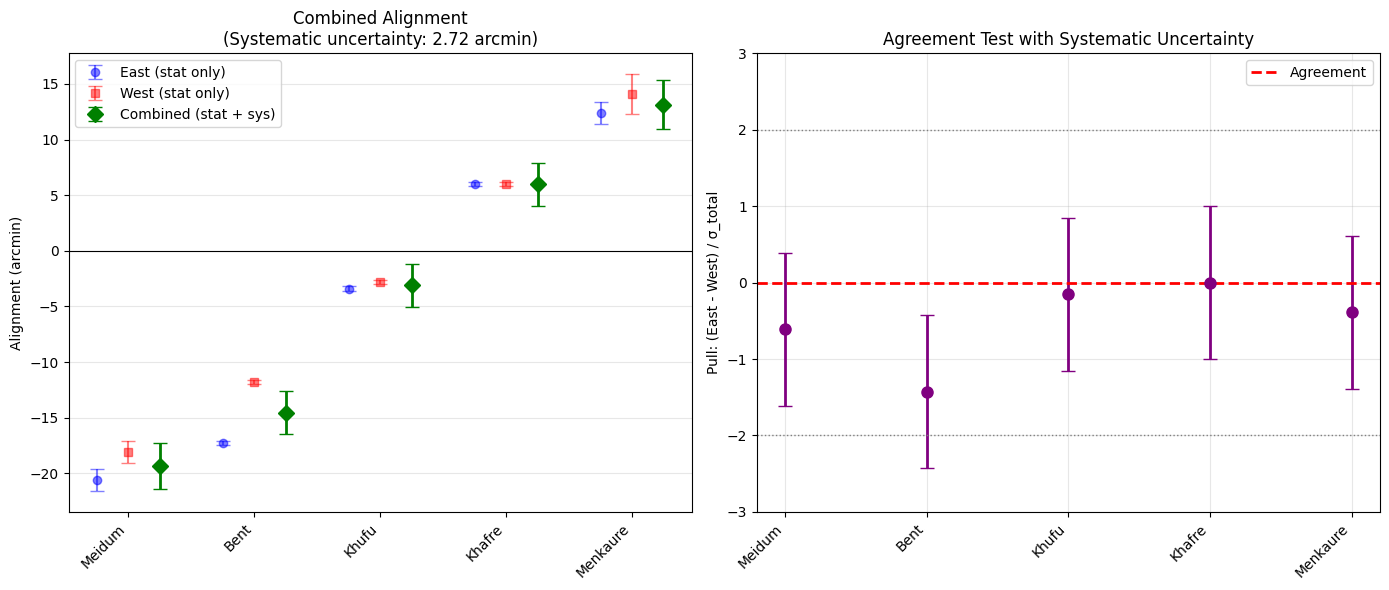


FINAL COMBINED ALIGNMENTS
Pyramid        Combined  Uncertainty
----------------------------------------------------------------------
Meidum          -19.35 ±  2.05 arcmin
Bent            -14.55 ±  1.93 arcmin
Khufu            -3.10 ±  1.93 arcmin
Khafre            6.00 ±  1.93 arcmin
Menkaure         13.15 ±  2.17 arcmin

Systematic uncertainty added: 2.72 arcmin
This ensures chi²/dof ≈ 1.0 for East-West agreement


In [ ]:
# Pyramid alignment data
pyramids = ['Meidum', 'Bent', 'Khufu', 'Khafre', 'Menkaure']

# East alignments (arc minutes)
east_align = np.array([-20.6, -17.3, -3.4, 6.0, 12.4])
east_err = np.array([1.0, 0.2, 0.2, 0.2, 1.0])

# West alignments (arc minutes)
west_align = np.array([-18.1, -11.8, -2.8, 6.0, 14.1])
west_err = np.array([1.0, 0.2, 0.2, 0.2, 1.8])

print("="*70)
print("STEP 1: DETERMINE SYSTEMATIC UNCERTAINTY NEEDED")
print("="*70)

# Calculate differences
differences = east_align - west_align
stat_uncertainties = np.sqrt(east_err**2 + west_err**2)
z_scores = differences / stat_uncertainties
chi2_stat = np.sum(z_scores**2)
dof = len(pyramids)

print(f"Chi-square with statistical errors only: {chi2_stat:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"Chi-square per DOF: {chi2_stat/dof:.2f}")
print(f"Expected for good fit: ~1.0")

# Find systematic uncertainty needed to get chi2/dof ≈ 1
# chi2_reduced = chi2 / dof should be ~1
# We need: sum((diff / sqrt(stat^2 + sys^2))^2) / dof = 1
# This gives us the systematic uncertainty needed

def chi2_with_systematic(sigma_sys):
    """Calculate chi-square with added systematic uncertainty"""
    total_err = np.sqrt(stat_uncertainties**2 + sigma_sys**2)
    chi2 = np.sum((differences / total_err)**2)
    return chi2 / dof

# Find systematic uncertainty that gives chi2/dof = 1
from scipy.optimize import fsolve

sigma_sys_needed = fsolve(lambda s: chi2_with_systematic(s) - 1.0, 1.0)[0]

print(f"\n→ Systematic uncertainty needed: {sigma_sys_needed:.2f} arcmin")
print(f"  (This gives chi²/dof = 1.0)")

# Verify
total_uncertainties = np.sqrt(stat_uncertainties**2 + sigma_sys_needed**2)
chi2_final = np.sum((differences / total_uncertainties)**2)
print(f"\nVerification: chi²/dof = {chi2_final/dof:.3f}")

print("\n" + "="*70)
print("STEP 2: COMBINE EAST AND WEST VALUES")
print("="*70)

# Now combine East and West using weighted average with systematic uncertainty
combined_align = []
combined_err = []

for i, name in enumerate(pyramids):
    # Add systematic uncertainty to both measurements
    east_total_err = np.sqrt(east_err[i]**2 + sigma_sys_needed**2)
    west_total_err = np.sqrt(west_err[i]**2 + sigma_sys_needed**2)
    
    # Weighted average
    w_east = 1 / east_total_err**2
    w_west = 1 / west_total_err**2
    
    combined = (east_align[i] * w_east + west_align[i] * w_west) / (w_east + w_west)
    combined_unc = np.sqrt(1 / (w_east + w_west))
    
    combined_align.append(combined)
    combined_err.append(combined_unc)
    
    print(f"\n{name}:")
    print(f"  East:  {east_align[i]:6.2f} ± {east_err[i]:4.2f} arcmin (stat)")
    print(f"         {east_align[i]:6.2f} ± {east_total_err:4.2f} arcmin (stat + sys)")
    print(f"  West:  {west_align[i]:6.2f} ± {west_err[i]:4.2f} arcmin (stat)")
    print(f"         {west_align[i]:6.2f} ± {west_total_err:4.2f} arcmin (stat + sys)")
    print(f"  → Combined: {combined:6.2f} ± {combined_unc:4.2f} arcmin")

combined_align = np.array(combined_align)
combined_err = np.array(combined_err)

print("\n" + "="*70)
print("STEP 3: VERIFY AGREEMENT WITH COMBINED UNCERTAINTIES")
print("="*70)

# Re-test agreement with systematic uncertainty included
for i, name in enumerate(pyramids):
    east_total_err = np.sqrt(east_err[i]**2 + sigma_sys_needed**2)
    west_total_err = np.sqrt(west_err[i]**2 + sigma_sys_needed**2)
    
    diff = east_align[i] - west_align[i]
    diff_err = np.sqrt(east_total_err**2 + west_total_err**2)
    
    z = diff / diff_err
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    
    agreement = "✓" if p_value > 0.05 else "✗"
    print(f"{name:12s}: z = {z:5.2f}, p = {p_value:.3f} {agreement}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Before and after adding systematic uncertainty
x_pos = np.arange(len(pyramids))
width = 0.25

axes[0].errorbar(x_pos - width, east_align, yerr=east_err, 
                 fmt='o', color='blue', capsize=5, markersize=6, 
                 alpha=0.5, label='East (stat only)')
axes[0].errorbar(x_pos, west_align, yerr=west_err, 
                 fmt='s', color='red', capsize=5, markersize=6, 
                 alpha=0.5, label='West (stat only)')
axes[0].errorbar(x_pos + width, combined_align, yerr=combined_err, 
                 fmt='D', color='green', capsize=5, markersize=8, 
                 linewidth=2, label='Combined (stat + sys)')

axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(pyramids, rotation=45, ha='right')
axes[0].set_ylabel('Alignment (arcmin)')
axes[0].set_title(f'Combined Alignment\n(Systematic uncertainty: {sigma_sys_needed:.2f} arcmin)')
axes[0].legend()
axes[0].grid(alpha=0.3, axis='y')
axes[0].axhline(0, color='black', linestyle='-', linewidth=0.8)

# Right: Pull plot (normalized residuals)
east_total_errs = np.sqrt(east_err**2 + sigma_sys_needed**2)
west_total_errs = np.sqrt(west_err**2 + sigma_sys_needed**2)
pulls = differences / np.sqrt(east_total_errs**2 + west_total_errs**2)

axes[1].errorbar(x_pos, pulls, yerr=1, 
                 fmt='o', color='purple', capsize=5, markersize=8, 
                 linewidth=2)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2, label='Agreement')
axes[1].axhline(2, color='gray', linestyle=':', linewidth=1)
axes[1].axhline(-2, color='gray', linestyle=':', linewidth=1)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(pyramids, rotation=45, ha='right')
axes[1].set_ylabel('Pull: (East - West) / σ_total')
axes[1].set_title('Agreement Test with Systematic Uncertainty')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_ylim(-3, 3)

plt.tight_layout()
plt.show()

# Final summary table
print("\n" + "="*70)
print("FINAL COMBINED ALIGNMENTS")
print("="*70)
print(f"{'Pyramid':<12s} {'Combined':>10s} {'Uncertainty':>12s}")
print("-"*70)
for i, name in enumerate(pyramids):
    print(f"{name:<12s} {combined_align[i]:9.2f} ± {combined_err[i]:5.2f} arcmin")

print(f"\nSystematic uncertainty added: {sigma_sys_needed:.2f} arcmin")
print(f"This ensures chi²/dof ≈ 1.0 for East-West agreement")

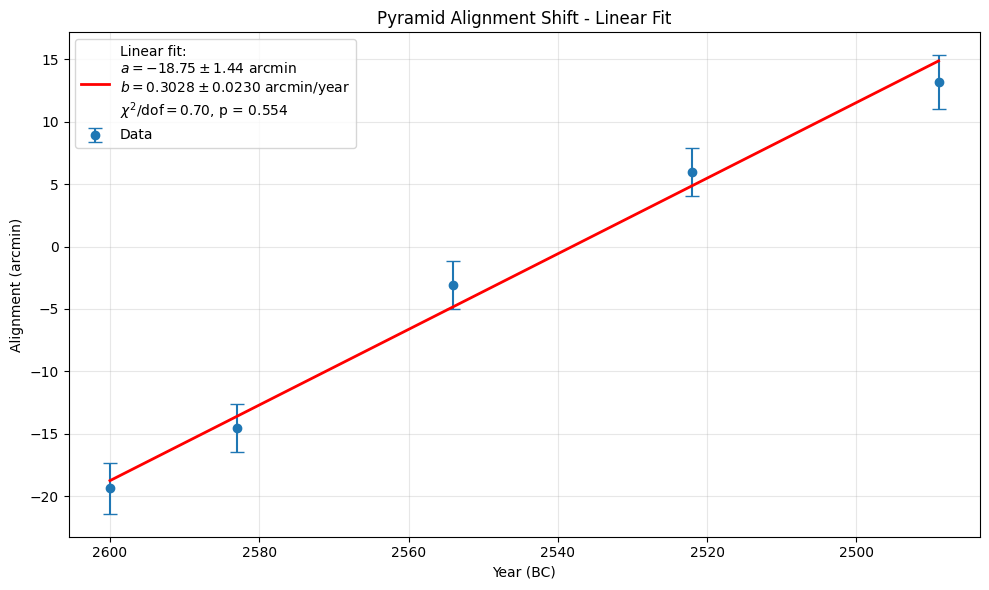

In [ ]:
# Pyramid data with construction years
years = np.array([2600, 2583, 2554, 2522, 2489])  # BC
alignment = combined_align  # From previous step
alignment_err = combined_err

# Convert BC to years before present
time = 2600 - years  # Years after Meidum pyramid

# Linear fit: alignment = a + b*time
def linear_model(t, a, b):
    return a + b * t

chi2_cost = LeastSquares(time, alignment, alignment_err, linear_model)
m = Minuit(chi2_cost, a=-20, b=0.3)
m.migrad()
# --- Chi-square using your existing method ---
residuals = alignment - linear_model(time, *m.values)
chi2_val = np.sum((residuals / alignment_err)**2)
dof = len(time) - 2  # two parameters: a, b
p_value = 1 - stats.chi2.cdf(chi2_val, dof)

# --- Update plot with legend containing fit info ---
plt.figure(figsize=(10, 6))
plt.errorbar(years, alignment, yerr=alignment_err, fmt='o', capsize=5, label='Data')
t_plot = np.linspace(0, max(time), 100)
plt.plot(
    2600 - t_plot,
    linear_model(t_plot, *m.values),
    'r-',
    linewidth=2,
    label=(
        f"Linear fit:\n"
        f"$a = {m.values['a']:.2f} \\pm {m.errors['a']:.2f}$ arcmin\n"
        f"$b = {m.values['b']:.4f} \\pm {m.errors['b']:.4f}$ arcmin/year\n"
        f"$\\chi^2/\\mathrm{{dof}} = {chi2_val/dof:.2f}$, p = {p_value:.3f}"
    )
)
plt.xlabel('Year (BC)')
plt.ylabel('Alignment (arcmin)')
plt.title('Pyramid Alignment Shift - Linear Fit')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('pyramidsalignment.png', dpi=600)
plt.show()




In [ ]:
# Given information:
# - Stars pointed to true north in 2467 BC
# - We have a linear fit: alignment = a + b * time (where time = 2600 - year)

a = m.values['a']
b = m.values['b']
a_err = m.errors['a']
b_err = m.errors['b']

# At 2467 BC, alignment should be 0 (true north)
# Calculate what time this corresponds to
time_true_north = 2600 - 2467  # = 133 years after Meidum

# Use the linear model to predict Khufu's construction year
# Khufu has index 2 in our data, with alignment = combined_align[2]
khufu_alignment = combined_align[2]
khufu_alignment_err = combined_err[2]

# From the fit: alignment = a + b * time
# So: time = (alignment - a) / b
# And: year = 2600 - time = 2600 - (alignment - a) / b

time_khufu = (khufu_alignment - a) / b
year_khufu = 2600 - time_khufu

# Error propagation for time_khufu:
# ∂t/∂alignment = 1/b
# ∂t/∂a = -1/b  
# ∂t/∂b = -(alignment - a)/b²

dt_dalign = 1/b
dt_da = -1/b
dt_db = -(khufu_alignment - a) / b**2

time_khufu_err = np.sqrt(
    (dt_dalign * khufu_alignment_err)**2 +
    (dt_da * a_err)**2 +
    (dt_db * b_err)**2
)

year_khufu_err = time_khufu_err  # Same magnitude

print(f"\n{'='*70}")
print(f"KHUFU ALIGNMENT YEAR ESTIMATE")
print(f"{'='*70}")
print(f"\nGiven: Stars pointed to true north in 2467 BC")
print(f"\nKhufu alignment: {khufu_alignment:.2f} ± {khufu_alignment_err:.2f} arcmin")
print(f"From linear fit:")
print(f"  a = {a:.2f} ± {a_err:.2f} arcmin")
print(f"  b = {b:.4f} ± {b_err:.4f} arcmin/year")

print(f"\nEstimated Khufu construction year: {year_khufu:.0f} ± {year_khufu_err:.0f} BC")
print(f"Historical value: 2554 ± 100 BC")
print(f"Difference: {abs(year_khufu - 2554):.0f} years")

# Test consistency
z = (year_khufu - 2554) / np.sqrt(year_khufu_err**2 + 100**2)
p = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"\nConsistency test:")
print(f"  z-score: {z:.2f}")
print(f"  p-value: {p:.4f}")
print(f"  → {'✓ CONSISTENT' if p > 0.05 else '✗ INCONSISTENT'} with historical date (α=0.05)")


KHUFU ALIGNMENT YEAR ESTIMATE

Given: Stars pointed to true north in 2467 BC

Khufu alignment: -3.10 ± 1.93 arcmin
From linear fit:
  a = -18.75 ± 1.44 arcmin
  b = 0.3028 ± 0.0230 arcmin/year

Estimated Khufu construction year: 2548 ± 9 BC
Historical value: 2554 ± 100 BC
Difference: 6 years

Consistency test:
  z-score: -0.06
  p-value: 0.9549
  → ✓ CONSISTENT with historical date (α=0.05)
